Projekt zaliczeniowy z przedmiotu **Eksploracyjna analiza danych**, na wydziale Matematyki i Informatyki. Projekt polega na przewidzeniu oceny jakości wina na podstawie jego wartości fizyczno-chemicznych.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dane = pd.read_csv('white_wine.csv', sep=";")

In [ ]:
dane.columns

for kolumna in dane.columns:
    print(kolumna, ' : ', dane[kolumna].unique())
    print('\n')

fixedacidity  :  ['7' '6,3' '8,1' '6,2' '8,6' '7,9' '6,6' '7,4' '6,4' '8,5' '8,3' '5,8'
 '7,3' '6,5' '6,7' '7,2' '6,8' '6,9' '6' '7,1' '6,1' '7,5' '9,8' '5,5'
 '5,9' '7,8' '8,2' '7,6' '5,2' '10,2' '5,6' '5,7' '7,7' '5,3' '5,4' '9,1'
 '5' '8' '10' '5,1' '9,2' '8,4' '8,8' '8,7' '9,4' '9,6' '9,7' '10,3' '9'
 '10,7' '8,9' '9,3' '9,9' '9,5' '11,8' '4,6' '6,15' '4,5' '7,15' '6,45'
 '4,2' '4,9' '4,8' '4,7' '3,8' '4,4' '3,9']


volatileacidity  :  [',27' ',3' ',28' ',32' ',22' ',23' ',18' ',16' ',17' ',48' ',66' ',34'
 ',31' ',25' ',24' ',14' ',12' ',39' ',33' ',45' ',46' ',19' ',2' ',38'
 ',47' ',35' ',26' ',54' ',43' ',44' ',21' ',265' ',36' ',305' ',13' ',41'
 ',485' ',425' ',37' ',255' ',595' ',29' ',42' ',245' ',685' ',495' ',64'
 ',4' ',115' ',58' ',585' ',59' ',6' ',15' ',55' ',1' ',335' ',905' ',49'
 ',155' ',52' ',51' ',62' ',345' ',475' ',56' ',105' ',57' ',67' ',5'
 ',11' ',225' ',395' ',655' ',205' ',415' ',705' ',08' ',68' ',275' ',61'
 ',365' ',165' ',145' ',85' ',185' ',325' ',4

In [ ]:
for kolumna in dane.columns:
    print(kolumna, ' : ', dane[kolumna].describe())
    print('\n')

fixedacidity  :  count     3934
unique      67
top        6,6
freq       240
Name: fixedacidity, dtype: object


volatileacidity  :  count     3934
unique     120
top        ,28
freq       219
Name: volatileacidity, dtype: object


citricacid  :  count     3934
unique      83
top         ,3
freq       247
Name: citricacid, dtype: object


residualsugar  :  count     3934
unique     301
top        1,2
freq       153
Name: residualsugar, dtype: object


chlorides  :  count     3934
unique     149
top       ,044
freq       164
Name: chlorides, dtype: object


freesulfurdioxide  :  count     3934
unique     124
top         29
freq       130
Name: freesulfurdioxide, dtype: object


totalsulfurdioxide  :  count     3934
unique     238
top        111
freq        52
Name: totalsulfurdioxide, dtype: object


density  :  count     3934
unique     834
top       ,992
freq        50
Name: density, dtype: object


pH  :  count     3934
unique     103
top       3,14
freq       140
Name: pH, dtype: ob

Jak możemy zauważyć w danych pojawiły się wartości typu object, my chcielibyśmy by były to wartości float, poza tym pojawiły się wartości w rodzaju ',445', można podejrzewać, iż prawidłowa wartość wynosiłaby w takim przypadku 0.445, tak też konwertuje te wartości program Microsoft Excel.

In [ ]:
for col in dane.columns:
    dane[col] = dane[col].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) and ',' in x else x)

W pierwszej kolejności zamieniliśmy przecinki na kropki i przekonwertowaliśmy takie obiekty na liczby typu float, ale przez warunek posiadania przecinka w obiekcie nie przekonwertowało nam to liczb całkowitych. Poprawy to.

In [ ]:
for col in dane.columns:
    dane[col] = dane[col].apply(lambda x: float(x) if isinstance(x, str) else x)

Użyjmy funkcji info() na przekonwertowanych danych.

In [ ]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934 entries, 0 to 3933
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fixedacidity        3934 non-null   float64
 1   volatileacidity     3934 non-null   float64
 2   citricacid          3934 non-null   float64
 3   residualsugar       3934 non-null   float64
 4   chlorides           3934 non-null   float64
 5   freesulfurdioxide   3934 non-null   float64
 6   totalsulfurdioxide  3934 non-null   float64
 7   density             3934 non-null   float64
 8   pH                  3934 non-null   float64
 9   sulphates           3934 non-null   float64
 10  alcohol             3934 non-null   float64
 11  quality             3934 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 368.9 KB


Jak widać nasze dane posiadają teraz wartości float64, tak ujednolicone będą przyjemniejsze do pracy. Możemy też zauważyć, że nie istanieją wartości null-owe. Sprawdźmy czy nie ma duplikatów.

In [ ]:
dane.duplicated().any()

True

Możemy zauważyć, że trafiły nam się duplikaty w danych, uzyskajmy więcej informacji na ten temat.

In [ ]:
dane[dane.duplicated(keep=False)]

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,4
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,4
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,4
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,4
5,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3883,6.4,0.23,0.35,10.3,0.042,54.0,140.0,0.99670,3.23,0.47,9.2,3
3899,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.1,4
3900,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.1,4
3904,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.0,4


Jak możemy zauważyć mamy duże powtórzeń danych w naszym zbiorze, może to zaburzyć działanie naszego modelu, sprawdźmy ile z nich możemy usunąć.

In [ ]:
len(dane[dane.duplicated()])

645

Możemy usunąć aż 645 duplikaty! Usuniemy je.

In [ ]:
dane.drop_duplicates(inplace=True)
dane

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,4
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,4
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,4
4,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,4
7,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3929,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,4
3930,6.2,0.210,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,4
3931,6.6,0.320,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,3
3932,6.5,0.240,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,4


Jak widać mamy teraz 3289 rekorów, wcześniej było to 3934. Nasz zbiór danych jest lżejszy, algorytmy które wykorzystamy będą działać sprawniej.

Podzielmy nasze dane na zbiór uczący oraz testowy.

In [ ]:
seed = 308161
x = dane.iloc[:,:-1]
y = dane['quality']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=seed,stratify=y)

In [ ]:
len(x_train) / (len(x_train) + len(x_test)), len(x_test) / (len(x_train)+len(x_test))

(0.6999087868653086, 0.3000912131346914)

Dane zostały podzielone, możemy przejść do wykonania eksploracyjnej analizy danych na zbiorze uczącym.

In [ ]:
for kolumna in dane.columns:
    print(kolumna, ' : ', dane[kolumna].describe())
    print('\n')

fixedacidity  :  count    3289.000000
mean        6.835771
std         0.855587
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        11.800000
Name: fixedacidity, dtype: float64


volatileacidity  :  count    3289.000000
mean        0.281002
std         0.104656
min         0.080000
25%         0.210000
50%         0.260000
75%         0.320000
max         1.100000
Name: volatileacidity, dtype: float64


citricacid  :  count    3289.000000
mean        0.333384
std         0.120735
min         0.000000
25%         0.260000
50%         0.320000
75%         0.390000
max         1.000000
Name: citricacid, dtype: float64


residualsugar  :  count    3289.000000
mean        6.024962
std         4.957895
min         0.600000
25%         1.600000
50%         4.800000
75%         9.100000
max        65.800000
Name: residualsugar, dtype: float64


chlorides  :  count    3289.000000
mean        0.045828
std         0.022832
min         0.009000
25%       

Po przeanalizowaniu podstawowych statystyk naszych danych możemy zauważyć pewne własności. Pierwszą z nich jest fakt, że średnie oraz miediany mają bardzo zbliżone do siebie wartości, może to sugerować dobre zróżnicowanie danych bez nieporządanych dziur i proporcjonalną ilość obserwacji ze skrajnymi wartościami.
Można również spostrzec dużą amplitudę w wartościach niektórych zmiennych, takich jak: lotna kwasowość, kwas cytrynowy, cukier resztkowy, chlorki, wolny i całkowity dwutlenek siarki. Ciężko powiedzieć w jaki sposób oddziałuje to na ocenę jakości wina, z tego co można śmiało powiedzieć to fakt, że ważnymi elementami w ocenie wina są na pewno kwasowość oraz cukier resztkowy. Poza tym najważniejszymi elementami przy ocenie są alkohol, siarczany oraz gęstość.

Przejdźmy do stworzenia macierzy korelacji naszych zmiennych jak i również zmienną celu.

In [ ]:
data = pd.merge(left=x_train, right=y_train, left_index=True, right_index=True)
data

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
2759,7.1,0.25,0.28,1.2,0.040,31.0,111.0,0.99174,3.18,0.53,11.1,3
1848,6.4,0.16,0.25,1.3,0.047,20.0,77.0,0.99330,3.61,0.54,10.2,4
1636,7.7,0.26,0.34,6.4,0.050,36.0,163.0,0.99370,3.19,0.70,11.5,4
558,8.1,0.46,0.31,1.7,0.052,50.0,183.0,0.99230,3.03,0.42,11.2,3
3793,6.4,0.42,0.46,8.4,0.050,58.0,180.0,0.99495,3.18,0.46,9.7,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3830,5.9,0.26,0.29,5.4,0.046,34.0,116.0,0.99224,3.24,0.41,11.4,4
593,6.0,0.33,0.27,0.8,0.185,12.0,188.0,0.99240,3.12,0.62,9.4,3
695,6.7,0.22,0.39,10.2,0.038,60.0,149.0,0.99725,3.17,0.54,10.0,5
2480,6.6,0.17,0.35,2.6,0.030,33.0,78.0,0.99146,3.22,0.72,11.3,4


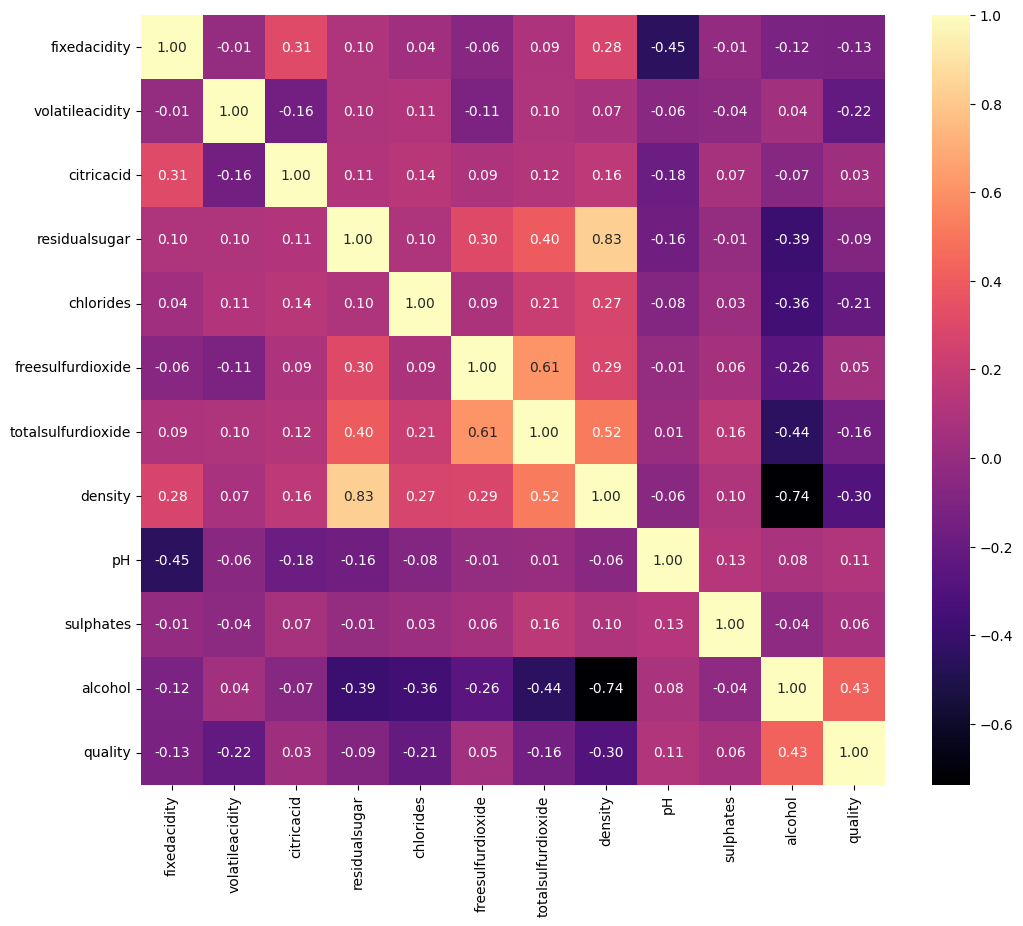

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap="magma",fmt='.2f')
plt.show()
plt.savefig('korelacje.png')

Z analizy korelacji naszych zmiennych wynika, że mocno skorelowane są ze sobą takie pary jak: {gęstość, cukier resztkowy}, {gęstość, alkohol}, {gęstość, całkowity dwutlenek siarki}, {wolny dwutlenek siarki, całkowity dwutlenek siarki}. Poza tym wiemy, że zmienna celu najmocniej jest skorelowana ze zmiennymi: alkohol, gęstość z odpowiednio wartościami korelacji: 0.43 oraz -0.30. Będą to najprawdopodobniej dwa najważniejsze predyktory.

Przejdźmy do sprawdzenia rozkładów naszych zmiennych.

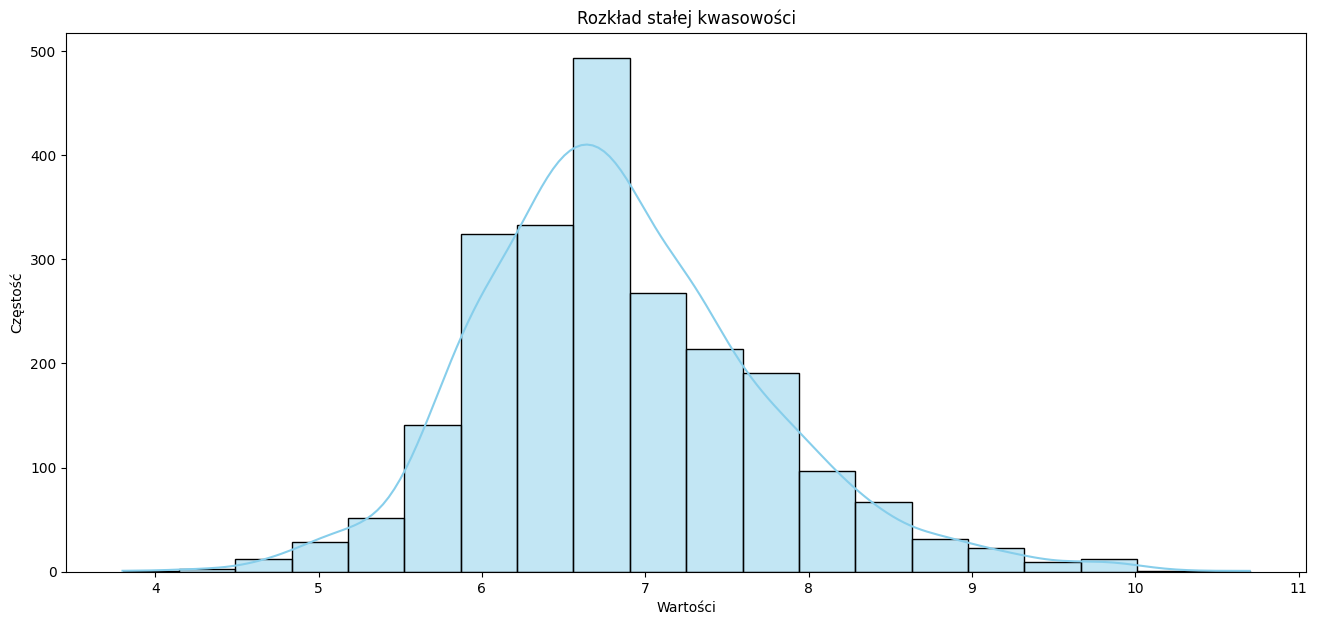

In [ ]:
plt.figure(figsize=(16,7))
sns.histplot(data['fixedacidity'], bins=20, color='skyblue', kde=True)
plt.title('Rozkład stałej kwasowości')
plt.ylabel('Częstość')
plt.xlabel('Wartości')
plt.savefig('Rozkład stałej kwasowości')

Rozkład **stałej kwasowości** jest bardzo zbliżony do rozkładu normalnego.

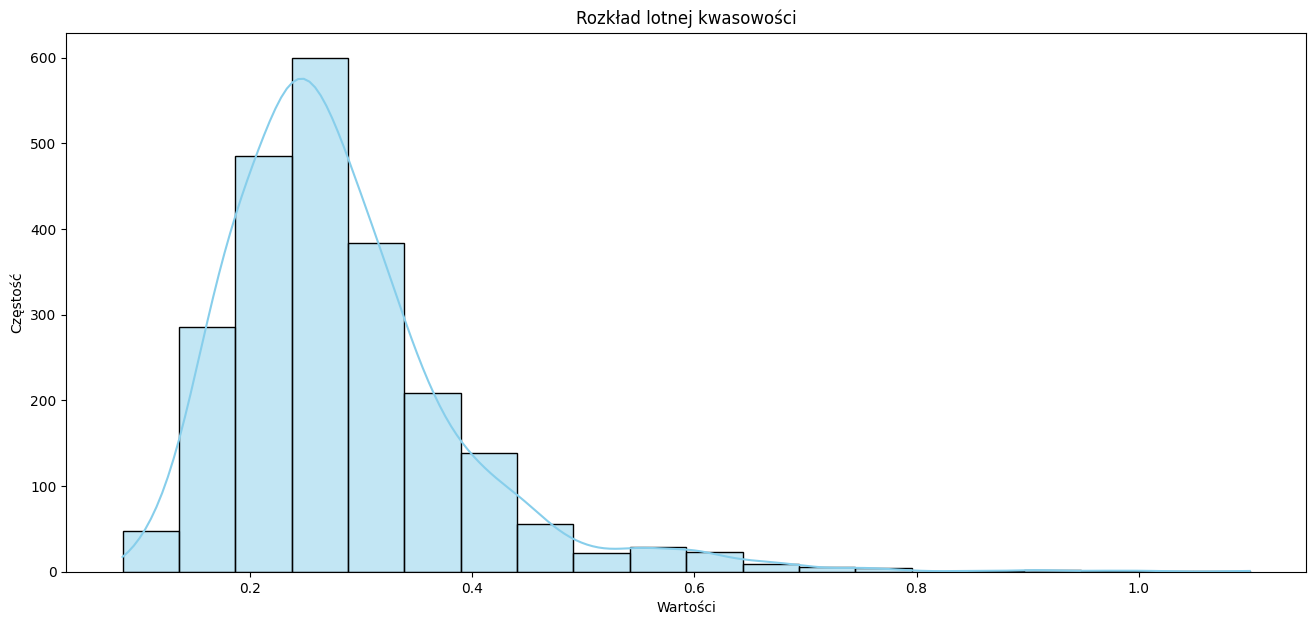

In [ ]:
plt.figure(figsize=(16,7))
sns.histplot(data['volatileacidity'], bins=20, color='skyblue', kde=True)
plt.title('Rozkład lotnej kwasowości')
plt.ylabel('Częstość')
plt.xlabel('Wartości')
plt.savefig('Rozkład lotnej kwasowości')

W przypadku zmiennej **lotna kwasowość** istnieje wyraźna asymetria prawostronna.

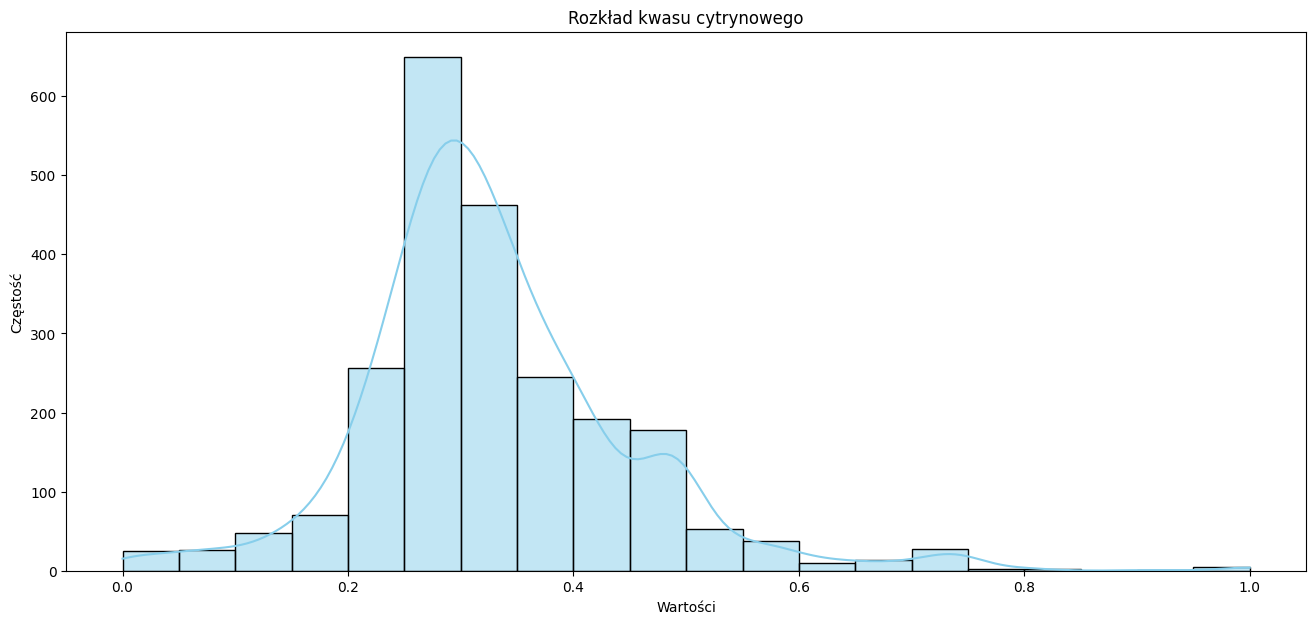

In [ ]:
plt.figure(figsize=(16,7))
sns.histplot(data['citricacid'], bins=20, color='skyblue', kde=True)
plt.title('Rozkład kwasu cytrynowego')
plt.ylabel('Częstość')
plt.xlabel('Wartości')
plt.savefig('Rozkład kwasu cytrynowego')

W przypadku **kwasu cytrynowego** również widać asymetrię prawostronną, poza tym widać niewielkie zaburzenia rozkładu normalnego przy wartości około 0.5.

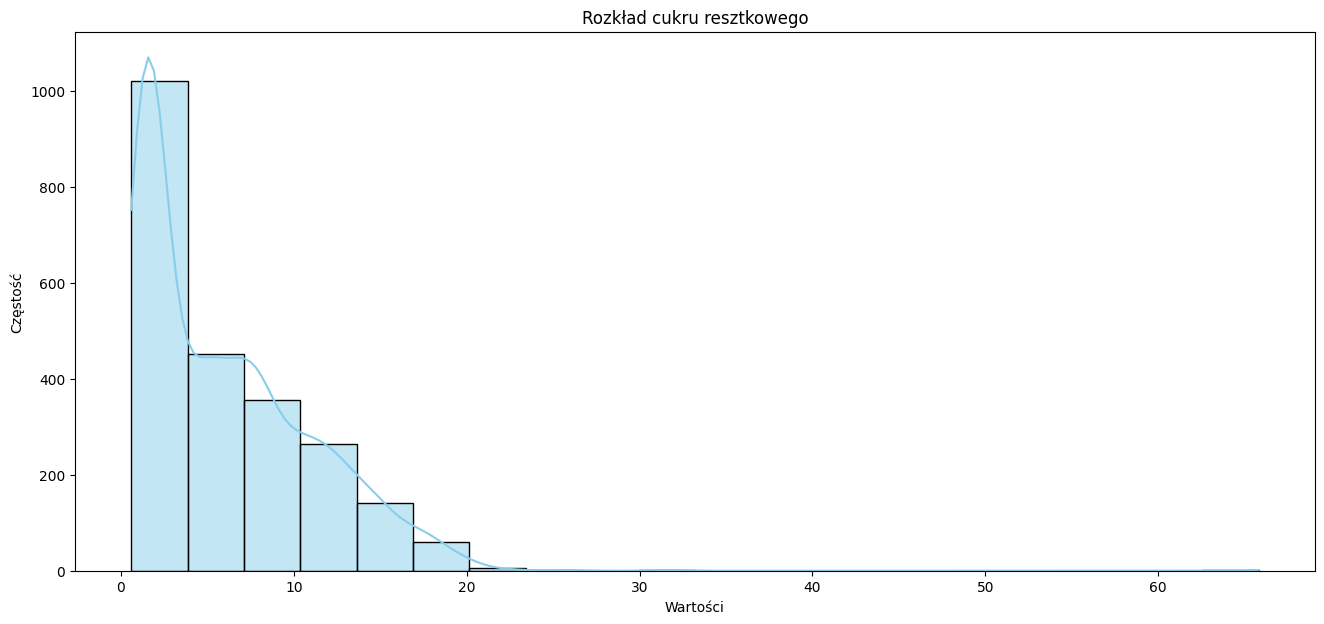

In [ ]:
plt.figure(figsize=(16,7))
sns.histplot(data['residualsugar'], bins=20, color='skyblue', kde=True)
plt.title('Rozkład cukru resztkowego')
plt.ylabel('Częstość')
plt.xlabel('Wartości')
plt.savefig('Rozkład cukru resztkowego')

**Cukier resztkowy** nie wykazuję rozkładu normalnego, bardziej przypomina to stosunek odwrotnie proporcjonalny, im większy poziom cukru tym mniejsza ilość takich obserwacji.

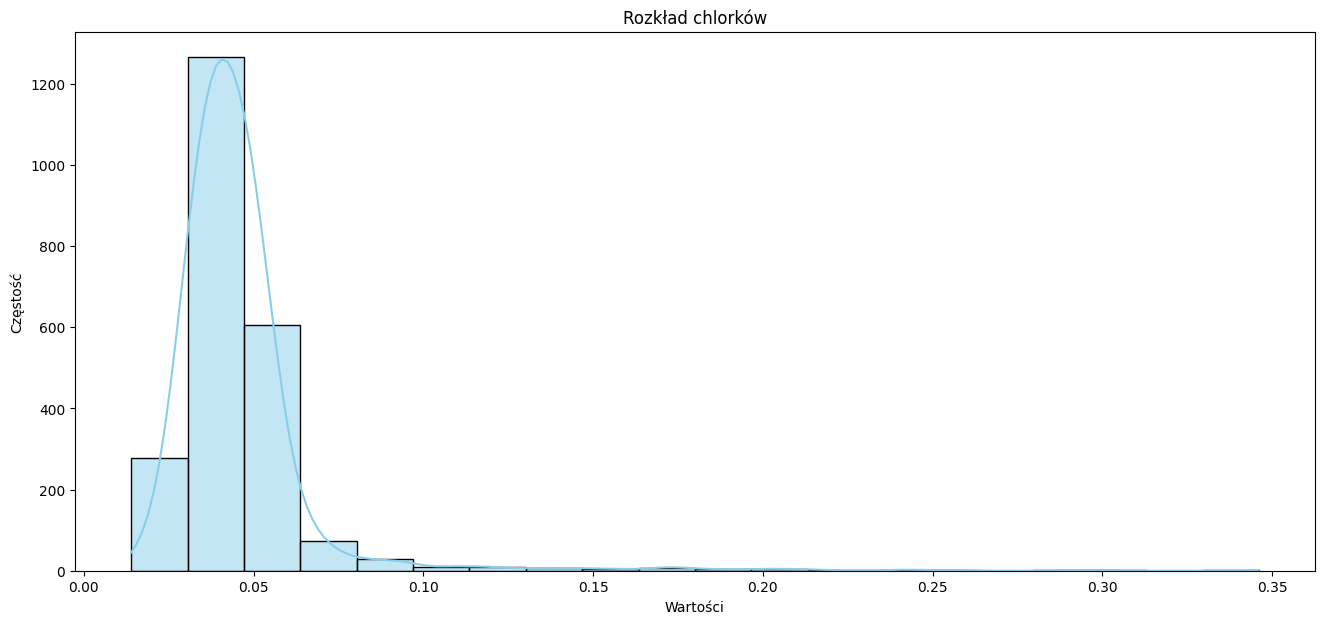

In [ ]:
plt.figure(figsize=(16,7))
sns.histplot(data['chlorides'], bins=20, color='skyblue', kde=True)
plt.title('Rozkład chlorków')
plt.ylabel('Częstość')
plt.xlabel('Wartości')
plt.savefig('Rozkład chlorków')

W wypadku **chlorków** widać bardzo wyraźną asymetrię prawostonną.

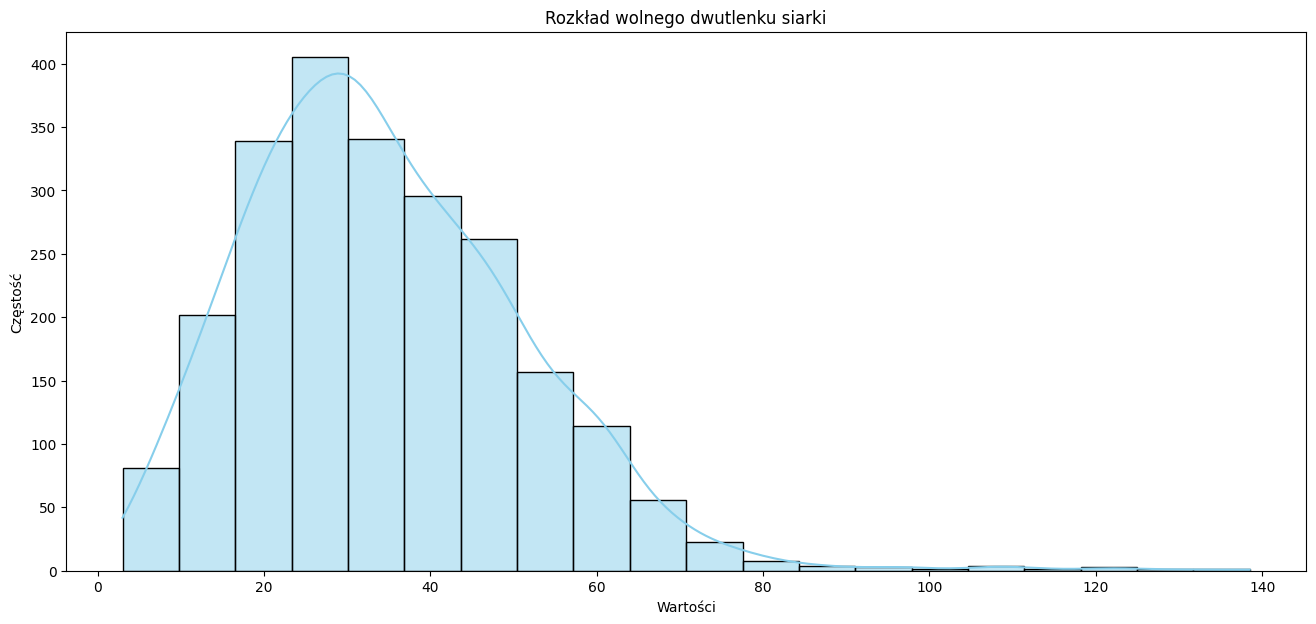

In [ ]:
plt.figure(figsize=(16,7))
sns.histplot(data['freesulfurdioxide'], bins=20, color='skyblue', kde=True)
plt.title('Rozkład wolnego dwutlenku siarki')
plt.ylabel('Częstość')
plt.xlabel('Wartości')
plt.savefig('Rozkład wolnego dwutlenku siarki')

Po raz kolejny asymetria prawostronna.

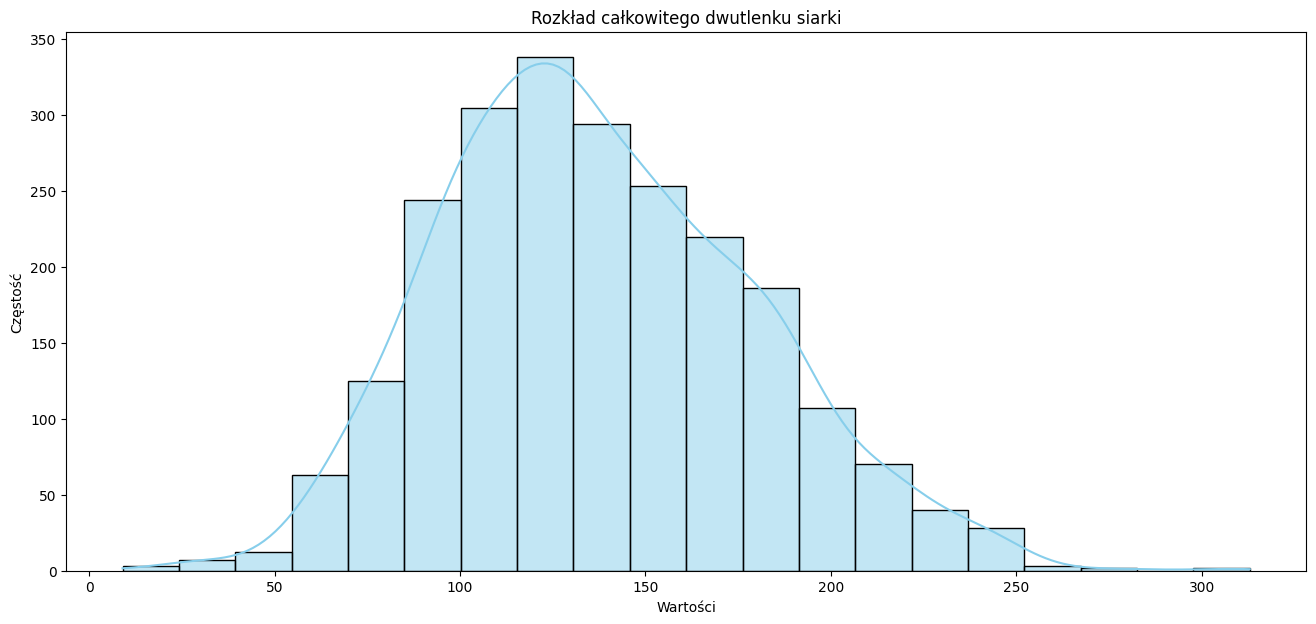

In [ ]:
plt.figure(figsize=(16,7))
sns.histplot(data['totalsulfurdioxide'], bins=20, color='skyblue', kde=True)
plt.title('Rozkład całkowitego dwutlenku siarki')
plt.ylabel('Częstość')
plt.xlabel('Wartości')
plt.savefig('Rozkład całkowitego dwutlenku siarki')

Rozkład całkowitego dwutlenku siarki jest podobny do rozkładu normalnego.

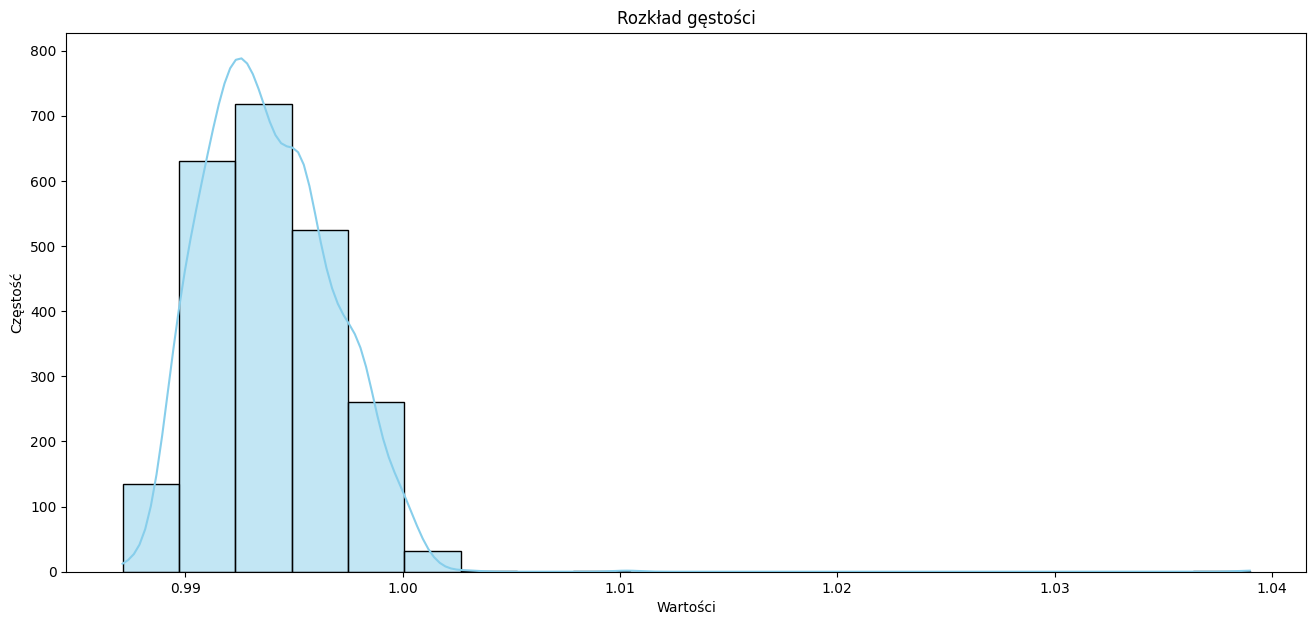

In [ ]:
plt.figure(figsize=(16,7))
sns.histplot(data['density'], bins=20, color='skyblue', kde=True)
plt.title('Rozkład gęstości')
plt.ylabel('Częstość')
plt.xlabel('Wartości')
plt.savefig('Rozkład gęstości')

Rozkład **gęstości** również wykazuje silną asymetrię prawostronną.

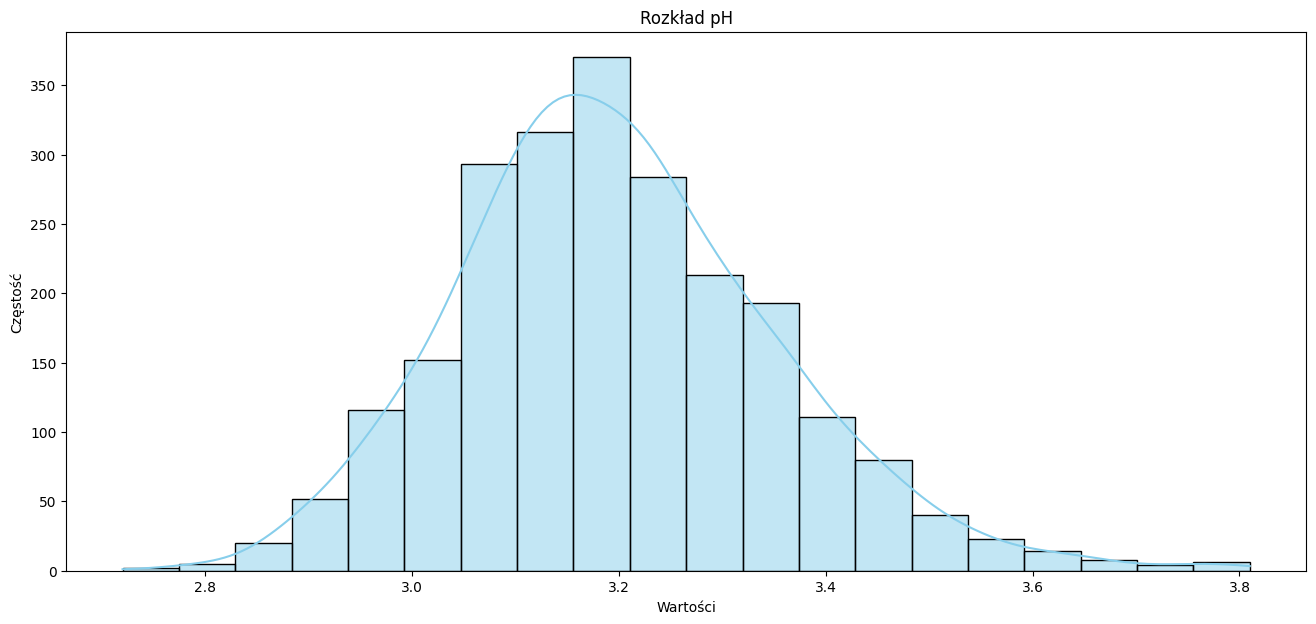

In [ ]:
plt.figure(figsize=(16,7))
sns.histplot(data['pH'], bins=20, color='skyblue', kde=True)
plt.title('Rozkład pH')
plt.ylabel('Częstość')
plt.xlabel('Wartości')
plt.savefig('Rozkład pH')

Rozkład **pH** wyraźnie przypomina rozkład normalny z **delikatną** asymetrią prawostroną

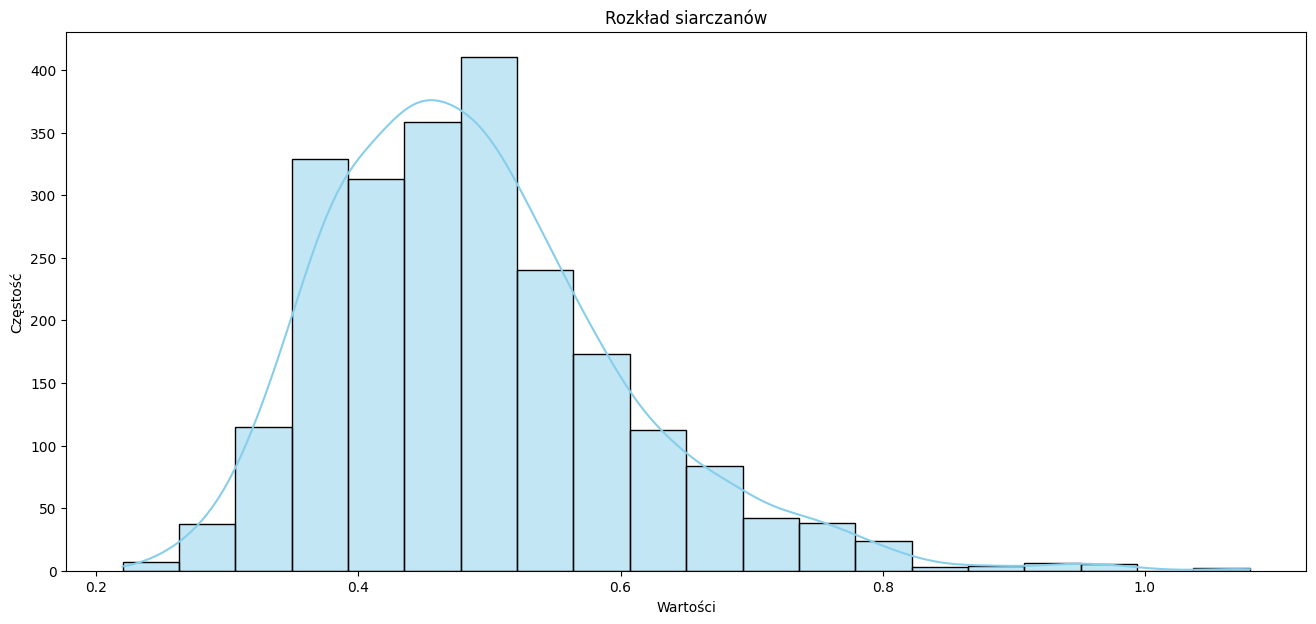

In [ ]:
plt.figure(figsize=(16,7))
sns.histplot(data['sulphates'], bins=20, color='skyblue', kde=True)
plt.title('Rozkład siarczanów')
plt.ylabel('Częstość')
plt.xlabel('Wartości')
plt.savefig('Rozkład siarczanów')

Rozkład **siarczanów** przypomina rozkład normalny z asymetrią prawostronną.

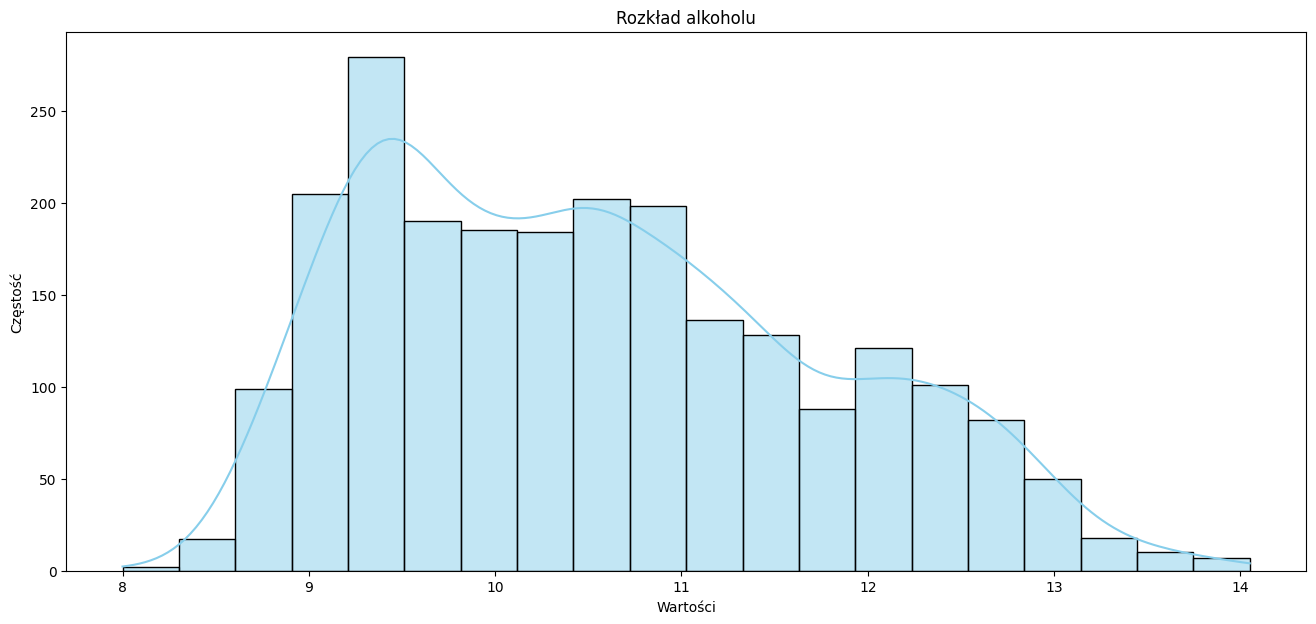

In [ ]:
plt.figure(figsize=(16,7))
sns.histplot(data['alcohol'], bins=20, color='skyblue', kde=True)
plt.title('Rozkład alkoholu')
plt.ylabel('Częstość')
plt.xlabel('Wartości')
plt.savefig('Rozkład alkoholu')

Rozkład **alkoholu** odbiega od rozkładu normalnego.

Sprawdźmy jeszcze rozkład naszej zmiennej celu.

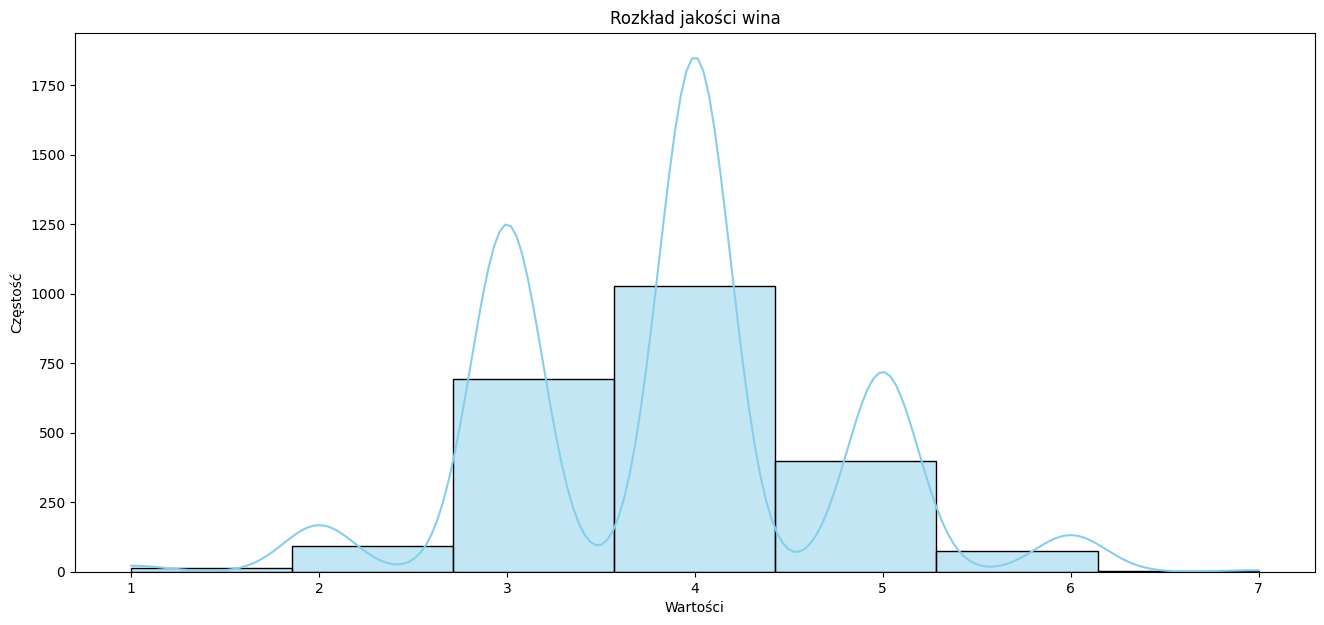

In [ ]:
plt.figure(figsize=(16,7))
sns.histplot(data['quality'], bins=7, color='skyblue', kde=True)
plt.title('Rozkład jakości wina')
plt.ylabel('Częstość')
plt.xlabel('Wartości')
plt.savefig('Rozkład jakości wina')

Widać zaburzenie w krzywej rozkładu, wiadome jest, że wartości są całkowite, aczkolwiek w danych są oznaczone teraz jako wartości rzeczywsite, z tego względu sprawdza nam to również wartości takie jak 3.5 które nie istnieją. Można jednak samemu śmiało stwierdzić, że nasza zmienna celu ma rozkład mocno przypominający rozkład normalny.

Przejdźmy do stworzenia modelu klasyfikacji. W tym celu użyjemy modelu opartego na algorytmie XGBoost, jest to bardzo efektywny algorytm, który powinien osiągnąć dobre wyniki. Najpierw musimy zainstalować pakiet xgboost.

In [ ]:
!pip install xgboost
import xgboost as xgb

Żeby nauczyć nasz model oparty o XGBoost najpierw musimy zakodować wartości naszej zmiennej celu na styl: [0,1,2,3,4,5,6] ze względu na wymagania algorytmu.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
xg_clf = xgb.XGBClassifier(objective ='multi:softmax', num_class = 7, n_estimators = 150, colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 20, seed=seed)
xg_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None, num_class=7,
              num_parallel_tree=None, ...)

In [ ]:
Y_test = le.fit_transform(y_test)
print(xg_clf.score(x_train, y_train))
print(xg_clf.score(x_test, Y_test))

1.0
0.5400202634245187


Jak widać na pierwszy rzut oka, nasz model jest mocno przeuczony, upewnijmy się sprawdzając założone statystyki dla naszych modeli.

In [ ]:
def ocena_modelu_z_odstepstwem(y_true, y_pred):
    """
    Ocena jakości modelu z dopuszczalnym odstępstwem o 1.

    Parameters:
    - y_true (list): Lista zawierająca prawdziwe wartości.
    - y_pred (list): Lista zawierająca przewidziane wartości przez model.

    Returns:
    - accuracy (float): Trafność modelu z uwzględnieniem dopuszczalnego odstępstwa o 1.
    """
    correct_predictions = 0

    for true_value, pred_value in zip(y_true, y_pred):
        if true_value - 1 <= pred_value <= true_value + 1:
            correct_predictions += 1

    accuracy = correct_predictions / len(y_true)
    return accuracy

In [ ]:
def ocena_modelu(y_true, y_pred):
    """
    Ocena jakości modelu

    Parameters:
    - y_true (list): Lista zawierająca prawdziwe wartości.
    - y_pred (list): Lista zawierająca przewidziane wartości przez model.

    Returns:
    - accuracy (float): Trafność modelu
    """
    correct_predictions = 0

    for true_value, pred_value in zip(y_true, y_pred):
        if pred_value == true_value:
            correct_predictions += 1

    accuracy = correct_predictions / len(y_true)
    return accuracy

In [ ]:
from sklearn.metrics import mean_absolute_error
def oblicz_mae(y_true, y_pred):
    """
    Obliczanie błędu MAE (Mean Absolute Error).

    Parameters:
    - y_true (list): Lista zawierająca prawdziwe wartości.
    - y_pred (list): Lista zawierająca przewidziane wartości przez model.

    Returns:
    - mae (float): Wartość błędu MAE.
    """
    return mean_absolute_error(y_true, y_pred)

In [ ]:
y_train_pred = xg_clf.predict(x_train)
y_test_pred = xg_clf.predict(x_test)

y_test_pred = le.inverse_transform(y_test_pred)

print("Trafność na zbiorze uczącym: ", round(ocena_modelu(y_train, y_train_pred), 3))
print("Trafność na zbiorze testowym: ", round(ocena_modelu(y_test, y_test_pred), 3))

print("Trafność z odstępstwem o 1 na zbiorze uczącym: ", round(ocena_modelu_z_odstepstwem(y_train, y_train_pred), 3))
print("Trafność z odstępstwem o 1 na zbiorze testowym: ", round(ocena_modelu_z_odstepstwem(y_test, y_test_pred), 3))

print("Średni błąd bezwględny dla zbioru uczącego: ", round(oblicz_mae(y_train, y_train_pred), 3))
print("Średni błąd bezwględny dla zbioru testowego: ", round(oblicz_mae(y_test, y_test_pred), 3))


Trafność na zbiorze uczącym:  1.0
Trafność na zbiorze testowym:  0.54
Trafność z odstępstwem o 1 na zbiorze uczącym:  1.0
Trafność z odstępstwem o 1 na zbiorze testowym:  0.945
Średni błąd bezwględny dla zbioru uczącego:  0.0
Średni błąd bezwględny dla zbioru testowego:  0.519


Wyniki dla zbioru uczącego są idealne, natomiast zbiór testowy wypada całkiem słabo, wyraźne przeuczenie modelu, do poprawy przejdziemy za chwilę. Sprawdźmy jeszcze ważność predyktorów w tym modelu.

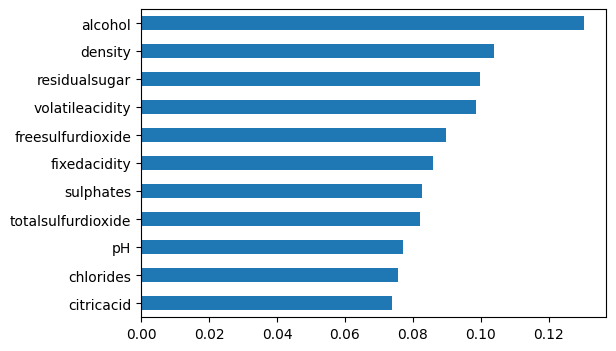

In [ ]:
def waznosc_predyktorow(drzewo):
  waznosci = pd.Series(drzewo.feature_importances_, index=x_train.columns)
  waznosci.sort_values(inplace=True)
  waznosci.iloc[-11:].plot(kind='barh', figsize=(6,4))
waznosc_predyktorow(xg_clf)

Jak podejrzewaliśmy najważniejszymi predyktorami były alkohol oraz gęstość. Widać jednak, że jest dużo zmiennych które mają prawie takie samo znaczenie dla oceny modelu. Dokładniej mówiąc nie ma takiej zmiennej, która nie odegrałby istotnej roli w tworzeniu modelu.

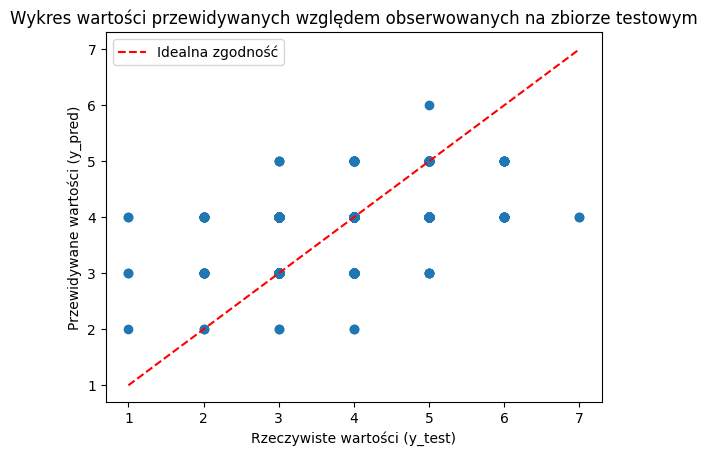

In [ ]:
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Idealna zgodność')
plt.xlabel('Rzeczywiste wartości (y_test)')
plt.ylabel('Przewidywane wartości (y_pred)')
plt.title('Wykres wartości przewidywanych względem obserwowanych na zbiorze testowym')
plt.legend()
plt.show()

Narysowanie wykresu obserwacji rzeczywistych do przewidywanych pokazuje istotny fakt w modelu. Model nie przewiduje poprawnej oceny jakości wina dla win o ocenach skrajnych. Nie znalazły się obserwacje zaklasyfikowane jako wina o jakości: 1, 6 ani 7. Poza tym model klasyfikuje wina z najwyższymi ocenami jako wina o jakości 4 lub 5, czy to może oznaczać, że te wina mają bardzo podobne wyniki testów fizyko-chemicznych? Model jest mocno przeuczony, następny model może nas zbliżyć do odpowiedzi.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
hiperparameters = {
    'n_estimators':[100, 150, 300, 500],
    'max_depth':[5, 10, 15, 20],
    'grow_policy': ['depthwise', 'lossguide'],
    'subsample': [0, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
    'gamma':[2, 3, 4, 5, 10, 15],
    'colsample_bytree':[0.1, 0.2, 0.3, 0.4, 0.5],
    'learning_rate':[0.01, 0.02, 0.05, 0.1, 0.2, 0.3],
    'reg_alpha':[0, 0.2, 0.4, 0.6, 0.8, 1],
    'reg_lambda':[0, 0.2, 0.4, 0.6, 0.8, 1]
}
xg_searched = RandomizedSearchCV(xgb.XGBClassifier(objective ='multi:softmax', num_class = 7, seed=seed), hiperparameters, n_iter= 1000)
xg_searched.fit(x_train, y_train)
xg_searched.best_params_, xg_searched.best_score_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x780adddb5270>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 589, in _next_wrapper
    def _next_wrapper(self, this: None) -> int:  # pylint: disable=unused-argument
KeyboardInterrupt: 


Po 40 minutach działania kalkulacji zostały nam zwrócone następujące paramtery: {
  'subsample': 0.6,
  'reg_lambda': 0.2,
  'reg_alpha': 0.4,
  'n_estimators': 500,
  'max_depth': 15,
  'learning_rate': 0.3,
  'grow_policy': 'depthwise',
  'gamma': 5,
  'colsample_bytree': 0.2
}
Oceńmy model z takimi parametrami.



In [ ]:
xg_searched = xgb.XGBClassifier(objective ='multi:softmax', num_class = 7, subsample = 0.6, reg_lambda = 0.2, reg_alpha = 0.4, n_estimators = 500, max_depth = 15, learning_rate = 0.3, grow_policy = 'depthwise', gamma = 5, colsample_bytree = 0.2, seed=seed)
xg_searched.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.2, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, num_class=7,
              num_parallel_tree=None, ...)

*powyższy kod został przygotowany do szybkiego stworzenia modelu o parametrach znalezionych przez RandomizedSearchCV by nie tracić czasu przy poźniejszej pracy*

In [ ]:
y_train_pred = xg_searched.predict(x_train)
y_test_pred = xg_searched.predict(x_test)

y_test_pred = le.inverse_transform(y_test_pred)

print("Trafność na zbiorze uczącym: ", round(ocena_modelu(y_train, y_train_pred), 3))
print("Trafność na zbiorze testowym: ", round(ocena_modelu(y_test, y_test_pred), 3))

print("Trafność z odstępstwem o 1 na zbiorze uczącym: ", round(ocena_modelu_z_odstepstwem(y_train, y_train_pred), 3))
print("Trafność z odstępstwem o 1 na zbiorze testowym: ", round(ocena_modelu_z_odstepstwem(y_test, y_test_pred), 3))

print("Średni błąd bezwględny dla zbioru uczącego: ", round(oblicz_mae(y_train, y_train_pred), 3))
print("Średni błąd bezwględny dla zbioru testowego: ", round(oblicz_mae(y_test, y_test_pred), 3))


Trafność na zbiorze uczącym:  0.576
Trafność na zbiorze testowym:  0.544
Trafność z odstępstwem o 1 na zbiorze uczącym:  0.943
Trafność z odstępstwem o 1 na zbiorze testowym:  0.944
Średni błąd bezwględny dla zbioru uczącego:  0.486
Średni błąd bezwględny dla zbioru testowego:  0.514


Wyniki uzyskane przez ten model nie pokazują efektu przeuczenia, aczkolwiek model nie uzyskał prawie żadnej poprawy w wynikach na zbiorze testowym względem naszego przeuczonego modelu. Po sprawdzeniu kilku róznych opcji nie udało mi się uzyskać lepszych wyników dla naszego modelu, co więcej przy oddzielnej próbie stworzenia modeli za pomocą drzew CART, C5, czy wielorakiej regresji liniowej uzyskałem znacznie gorsze wyniki dla przedstawionych danych. Sprawdźmy jak wyglądają ważności predyktorów w tym modelu.

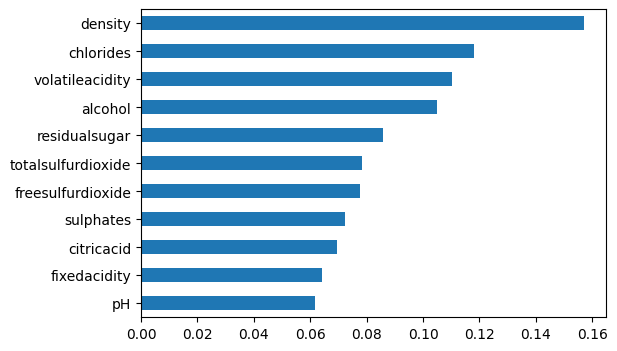

In [ ]:
waznosc_predyktorow(xg_searched)

O dziwo alkohol spradł w ważności predyktorów, z pierwszego miejsca znalazł się na 4. Najważniejszym czynnikiem w tym wypadku okazała się gęstość, poza tym dalej wszystkie predyktory odgrywają swoją rolę w działaniu modelu.

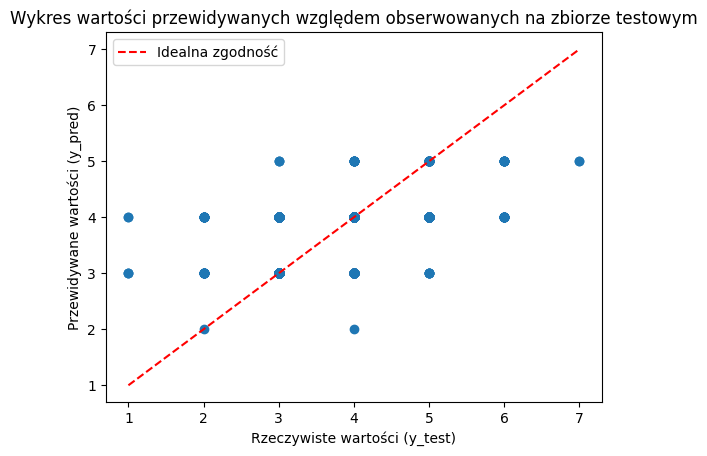

In [ ]:
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Idealna zgodność')
plt.xlabel('Rzeczywiste wartości (y_test)')
plt.ylabel('Przewidywane wartości (y_pred)')
plt.title('Wykres wartości przewidywanych względem obserwowanych na zbiorze testowym')
plt.legend()
plt.show()

Poprawiony model dalej nie odgaduje poprawnie win o skrajnych jakościach, również wina o jakościach 6 czy 7 klasyfikuje jako wina o jakościach 4 lub 5. Ten model nie jest idealny, możliwe że nadaje się do oceny jakości średnich win, jednak na pewno nie nadaje się do znajdowania win o wysokiej jakości. Taką ocene lepiej pozostawić ekspertom.

Dodajmy teraz nasze wartości do zmiennej *data*.

In [ ]:
y_train_pred = le.inverse_transform(y_train_pred)

test_data = pd.merge(left=x_test, right=y_test, left_index=True, right_index=True)

data['quality_class'] = y_train_pred
test_data['quality_class'] = y_test_pred

Przejdźmy do stworzenia modelu szacowania o oparte dane. Tym razem stworzymy model oparty o sieci neuronowe, aby skrócić pracę od razu przejdziemy do znalezienia najlepszych hiperparametrów dla naszego modelu, również poprzez przeszukanie klasą **RandomizedSearchCV**

W pierwszej kolejności jednak znormalizujemy nasze zmienne, ponieważ tego wymaga implementacja sieci neuronowych w pakiecie sklearn.

In [ ]:
from sklearn.compose import make_column_selector
sel_num = make_column_selector(dtype_include=['int64', 'float64'])
sel_num(x)

['fixedacidity',
 'volatileacidity',
 'citricacid',
 'residualsugar',
 'chlorides',
 'freesulfurdioxide',
 'totalsulfurdioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

Stwórzmy odpowiedni ColumnTransformer:

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

preprocesor = ColumnTransformer(transformers =
                                [('num', MinMaxScaler(feature_range = (-1,1)), sel_num)])
preprocesor

ColumnTransformer(transformers=[('num', MinMaxScaler(feature_range=(-1, 1)),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ee1a1baec80>)])

Jak wyglądają nasze zmienne po normalizacji?

In [ ]:
tmp = preprocesor.fit_transform(x_train)
pd.DataFrame(tmp, columns = preprocesor.get_feature_names_out())

,num__fixedacidity,num__volatileacidity,num__citricacid,num__residualsugar,num__chlorides,num__freesulfurdioxide,num__totalsulfurdioxide,num__density,num__pH,num__sulphates,num__alcohol
0,-0.043478,-0.674877,-0.44,-0.981595,-0.843373,-0.586716,-0.328947,-0.821477,-0.155963,-0.279070,0.024793
1,-0.246377,-0.852217,-0.50,-0.978528,-0.801205,-0.749077,-0.552632,-0.761326,0.633028,-0.255814,-0.272727
2,0.130435,-0.655172,-0.32,-0.822086,-0.783133,-0.512915,0.013158,-0.745903,-0.137615,0.116279,0.157025
3,0.246377,-0.261084,-0.38,-0.966258,-0.771084,-0.306273,0.144737,-0.799884,-0.431193,-0.534884,0.057851
4,-0.246377,-0.339901,-0.08,-0.760736,-0.783133,-0.188192,0.125000,-0.697706,-0.155963,-0.441860,-0.438017
...,...,...,...,...,...,...,...,...,...,...,...
2297,-0.391304,-0.655172,-0.42,-0.852761,-0.807229,-0.542435,-0.296053,-0.802198,-0.045872,-0.558140,0.123967
2298,-0.362319,-0.517241,-0.46,-0.993865,0.030120,-0.867159,0.177632,-0.796029,-0.266055,-0.069767,-0.537190
2299,-0.159420,-0.733990,-0.22,-0.705521,-0.855422,-0.158672,-0.078947,-0.609023,-0.174312,-0.255814,-0.338843
2300,-0.188406,-0.832512,-0.30,-0.938650,-0.903614,-0.557196,-0.546053,-0.832273,-0.082569,0.162791,0.090909


Musimy jeszcze przywrócić prawdziwe kategorie na zmiennej celu w zbiorze treningowym.

In [ ]:
y_train = le.inverse_transform(y_train)

Stwórzmy pipeline, który odpowie za transformację naszych danych oraz wygeneruje model regresji do optymalizacji.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
pipeline_1 = Pipeline(steps = [('prep', preprocesor),
                           ('siec', MLPRegressor(random_state=seed))
                          ]
                 )
pipeline_1

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  MinMaxScaler(feature_range=(-1,
                                                                              1)),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ee1a1baec80>)])),
                ('siec', MLPRegressor(random_state=308161))])

In [ ]:
pipeline_1.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  MinMaxScaler(feature_range=(-1,
                                                                              1)),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ee1a1baec80>)])),
                ('siec', MLPRegressor(random_state=308161))])

Teraz przygotujemy przestrzeń hiperparametrów do przeszukania najlepszej kombinacji.

In [ ]:
param_dist = {
    'siec__hidden_layer_sizes': [(50,), (100,), (150,), (50, 50), (100, 100)],
    'siec__activation': ['logistic', 'tanh', 'relu'],
    'siec__alpha': 10.0 ** -np.arange(1, 7),
    'siec__learning_rate': ['constant', 'invscaling', 'adaptive'],
    'siec__max_iter': [100, 200, 400, 700, 1000, 1500],
    'siec__solver' : ['adam', 'lbfgs', 'sgd']
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline_1, param_distributions=param_dist, n_iter=200, n_jobs=-1, random_state=seed)

In [ ]:
random_search.fit(x_train, y_train)
print("Best parameters: ", random_search.best_params_)

KeyboardInterrupt: 

Po dość długim oczekiwaniu na wynik algorytmu parametry jakie zostały nam zwrócone to: {
  'siec__solver': 'adam', 'siec__max_iter': 1000, 'siec__learning_rate': 'invscaling', 'siec__hidden_layer_sizes': (150,), 'siec__alpha': 0.01, 'siec__activation': 'relu'
}

Stwórzmy teraz model z wybranymi parametrami.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
pipeline_2 = Pipeline(steps = [('prep', preprocesor),
                           ('siec', MLPRegressor(random_state=seed, solver='adam', max_iter=1000, learning_rate='invscaling', alpha=0.01, activation='relu', hidden_layer_sizes=(150,)))
                          ]
                 )
pipeline_2

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  MinMaxScaler(feature_range=(-1,
                                                                              1)),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ee1a1baec80>)])),
                ('siec',
                 MLPRegressor(alpha=0.01, hidden_layer_sizes=(150,),
                              learning_rate='invscaling', max_iter=1000,
                              random_state=308161))])

In [ ]:
pipeline_2.fit(x_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  MinMaxScaler(feature_range=(-1,
                                                                              1)),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ee1a1baec80>)])),
                ('siec',
                 MLPRegressor(alpha=0.01, hidden_layer_sizes=(150,),
                              learning_rate='invscaling', max_iter=1000,
                              random_state=308161))])

In [ ]:
y_train_pred_mlp = pipeline_2.predict(x_train)
y_test_pred_mlp = pipeline_2.predict(x_test)

for i, item in enumerate(y_train_pred_mlp):
        y_train_pred_mlp[i] = round(item)

for i, item in enumerate(y_test_pred_mlp):
        y_test_pred_mlp[i] = round(item)

print("Trafność na zbiorze uczącym: ", round(ocena_modelu(y_train, y_train_pred_mlp), 3))
print("Trafność na zbiorze testowym: ", round(ocena_modelu(y_test, y_test_pred_mlp), 3))

print("Trafność z odstępstwem o 1 na zbiorze uczącym: ", round(ocena_modelu_z_odstepstwem(y_train, y_train_pred_mlp), 3))
print("Trafność z odstępstwem o 1 na zbiorze testowym: ", round(ocena_modelu_z_odstepstwem(y_test, y_test_pred_mlp), 3))

print("Średni błąd bezwględny dla zbioru uczącego: ", round(oblicz_mae(y_train, y_train_pred_mlp), 3))
print("Średni błąd bezwględny dla zbioru testowego: ", round(oblicz_mae(y_test, y_test_pred_mlp), 3))


Trafność na zbiorze uczącym:  0.592
Trafność na zbiorze testowym:  0.546
Trafność z odstępstwem o 1 na zbiorze uczącym:  0.967
Trafność z odstępstwem o 1 na zbiorze testowym:  0.949
Średni błąd bezwględny dla zbioru uczącego:  0.444
Średni błąd bezwględny dla zbioru testowego:  0.508


Jak widać model regresyjny ooparty o klasę MLPRegressor uzyskał bardzo podobne wyniki do modelu klasyfikacji opartego o XGBoost. Różnica między modelami jest naprawdę marginalna, dla zbioru testowego różnią się o wartości tysięczne. Model regresyjny uzyskał delikatnie lepsze wyniki dla zbioru testowego, natomiast model klasyfikacyjny wydaje się mieć bardziej stabilne wyniki, różnice między wynikami dla zbiorów są mniejsze.

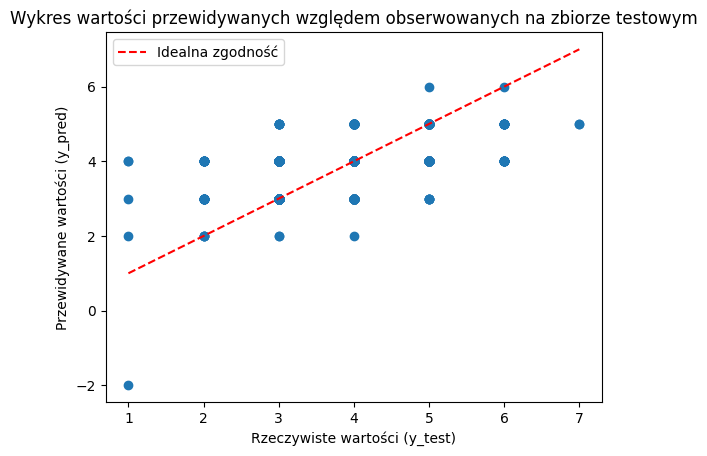

In [ ]:
plt.scatter(y_test, y_test_pred_mlp)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Idealna zgodność')
plt.xlabel('Rzeczywiste wartości (y_test)')
plt.ylabel('Przewidywane wartości (y_pred)')
plt.title('Wykres wartości przewidywanych względem obserwowanych na zbiorze testowym')
plt.legend()
plt.show()

Model regresyjny dalej nie jest w stanie przwidzieć poprawnie skrajnej oceny wina jak 1 lub 7, poprawił się jednak jeżeli chodzi o przewidywanie oceny 6, ale zdarzyła się sytuacja w której ocenił wino o jakości 1 jako -2, sprawdźmy ile razy wystąpiła taka anomalia.

In [ ]:
ilosc = 0
for element in y_test_pred_mlp:
  if element == -2:
     print(element)
     ilosc += 1
print("Ilość anomali o wartości -2: ", ilosc)

-2.0
Ilość anomali o wartości -2:  1


Widocznie trafiła się jedna taka obserwacja, musiałbyć to jakiś błąd.

Sprawdźmy informację na temat naszej sieci.

In [ ]:
def info_o_sieci(potok, krok):
    print('Liczba warstw: ',potok.named_steps[krok].n_layers_)
    print('Liczba neuronów w warstwie wejściowej: ',potok.named_steps[krok].n_features_in_)
    print('Liczba neuronów w warstwach ukrytych: ', potok.named_steps[krok].hidden_layer_sizes)
    print('Funkcja aktywacji w warstwach ukrytych : ',potok.named_steps[krok].activation)
    print('Liczba neuronów w warstwie wyjściowej: ',potok.named_steps[krok].n_outputs_)
    print('Funkcja aktywacji w warstwie wyjściowej : ',potok.named_steps[krok].out_activation_)

In [ ]:
info_o_sieci(pipeline_2, 'siec')

Liczba warstw:  3
Liczba neuronów w warstwie wejściowej:  11
Liczba neuronów w warstwach ukrytych:  (150,)
Funkcja aktywacji w warstwach ukrytych :  relu
Liczba neuronów w warstwie wyjściowej:  1
Funkcja aktywacji w warstwie wyjściowej :  identity


Nasza sieć ma 3 warstwy, liczba neuronów w wartwie wejściowej odpowiada liczbie parametrów, funkcją aktywacji jest funkcja 'relu', zwraca ona wartość wejściową jeżeli jest dodatnia, w przeciwnym wypadku zwraca 0. W warstwie wyjściowej mamy jeden neuron z aktywacją identycznościową, czyli zwracana jest wartość przewidywana dla zmiennej celu.

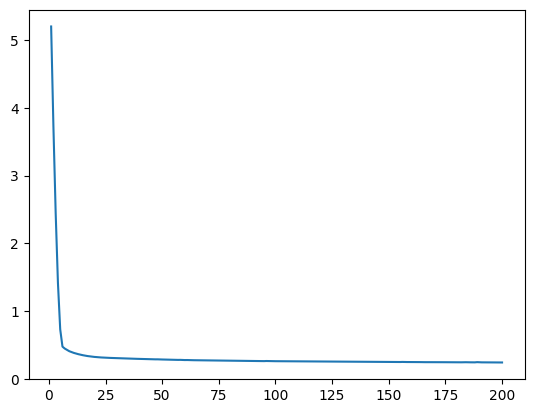

In [ ]:
liczba_epok = len(pipeline_1.named_steps['siec'].loss_curve_)
plt.plot(range(1,liczba_epok+1), pipeline_1.named_steps['siec'].loss_curve_)

Nasza funkcja straty pokazuję dużą stabilność, po gwałtownym spadku na samym początku bardzo szybko stabilizuje się z niską stratą. Nie widać żadnych anomalii.

In [ ]:
data['quality_reg'] = y_train_pred_mlp
test_data['quality_reg'] = y_test_pred_mlp

Przejdźmy do pogrupowania naszych danych. W tym celu użyjemy klasy DBSCAN, najpierw musimy ustalić wartość parametrów konstruktora, **min_samples** bedzie równe 22 ze względu na podwojoną ilość paramterów, do znalezienia odpowiedniej wartości zmiennej **eps** zastosujemy metodę zalecaną przez twórców.



In [ ]:
from sklearn.neighbors import NearestNeighbors
k = 21
sasiedzi = NearestNeighbors(n_neighbors = k + 1)
sasiedzi.fit(x_train)
dist, ind = sasiedzi.kneighbors(x_train)

In [ ]:
pd.DataFrame(ind).head(10)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0,1490,938,1007,1371,2052,1494,58,1406,969,...,1032,1516,1132,983,1134,814,1114,552,261,1521
1,1,296,333,400,1401,451,2296,2252,975,1025,...,2244,2263,1797,1830,612,399,1829,431,985,173
2,2,1220,358,2159,1710,1418,2116,246,1085,2027,...,205,2212,915,1461,724,799,1120,1184,198,277
3,3,210,310,677,723,1517,732,1913,1020,2195,...,1138,810,1367,1182,189,1451,1688,1666,1589,286
4,4,131,955,1969,144,1864,373,137,138,2065,...,2032,299,229,797,692,580,739,1688,1927,774
5,5,472,2226,952,1848,2192,2154,54,2217,1500,...,2129,52,1637,862,1773,1788,1334,697,37,2046
6,6,301,1918,1096,22,2191,2053,1068,442,1683,...,559,568,292,1877,1916,1808,1255,876,1014,1909
7,7,1415,577,1070,130,932,1265,331,1065,1906,...,1113,1910,960,1041,1112,1677,854,2205,974,1519
8,8,449,2248,97,665,2087,1894,534,376,1610,...,2198,1641,1673,920,2156,620,1227,153,1744,987
9,9,1405,570,1260,1223,1923,61,1525,1353,1293,...,1398,1491,1019,2000,2181,506,2292,251,1961,2228


In [ ]:
pd.DataFrame(dist).head(10)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,1.127342,1.446953,1.456836,1.594441,1.697676,2.073452,2.921230,2.927083,3.092998,...,3.312181,3.353976,3.378252,3.594016,3.736512,3.748716,4.109053,4.221946,4.299264,4.523960
1,0.0,0.979186,1.419229,2.221199,2.574283,2.721432,3.018858,3.181660,3.438104,3.581802,...,3.944082,3.997922,4.140979,4.142367,4.157299,4.311008,4.407713,4.429815,4.593661,4.634950
2,0.0,2.989627,3.165071,4.361555,4.421861,4.477496,4.520857,4.586472,5.071761,5.291196,...,5.698553,5.843168,5.879240,6.007154,6.065174,6.076501,6.179890,6.236794,6.281767,6.291941
3,0.0,2.264208,3.190699,3.744488,3.754214,4.379846,4.745675,5.061661,5.521192,6.184773,...,6.430435,6.820576,7.225629,7.225937,7.309337,7.394473,7.429809,7.548234,7.599089,7.622035
4,0.0,3.293787,3.391901,3.532154,3.728585,3.818757,4.192896,4.591624,5.031223,5.095006,...,5.583943,5.643479,6.270809,6.319557,6.477974,6.502448,6.640064,6.847819,6.914740,6.976518
5,0.0,3.314704,3.391687,4.047222,4.267019,4.369637,4.431242,4.460978,5.130858,5.174544,...,5.515244,5.655721,5.818404,6.250884,6.295716,6.434065,6.508043,6.604832,6.680526,6.691670
6,0.0,2.268373,3.338264,4.476908,4.937276,5.169320,5.422096,5.533241,5.764819,5.997730,...,6.545851,6.560736,6.861912,7.116812,7.275844,7.455559,7.724856,7.901160,8.034047,8.167749
7,0.0,2.420805,2.501800,2.556702,2.665313,3.172570,3.201611,3.389621,3.481682,3.586503,...,3.996968,4.017903,4.038594,4.039644,4.076103,4.125741,4.198419,4.356820,4.417772,4.424727
8,0.0,1.715343,2.126833,2.384660,2.502768,2.508194,3.082824,3.132327,3.265470,3.271801,...,3.758191,3.798426,3.802213,3.803872,4.015394,4.220371,4.594443,4.621911,4.944326,5.031265
9,0.0,2.409921,2.702835,3.252065,4.190960,4.775243,5.077139,5.527201,6.166938,6.167545,...,8.751006,9.216714,9.314527,9.420823,9.489828,9.878209,9.996301,10.192720,10.216357,10.384194


Interesują nas odległości od 21 najbliższych sąsiadów znajdujących się w ostatniej kolumnie tablicy. Posortujmy je malejąco i narysujmy wykres.

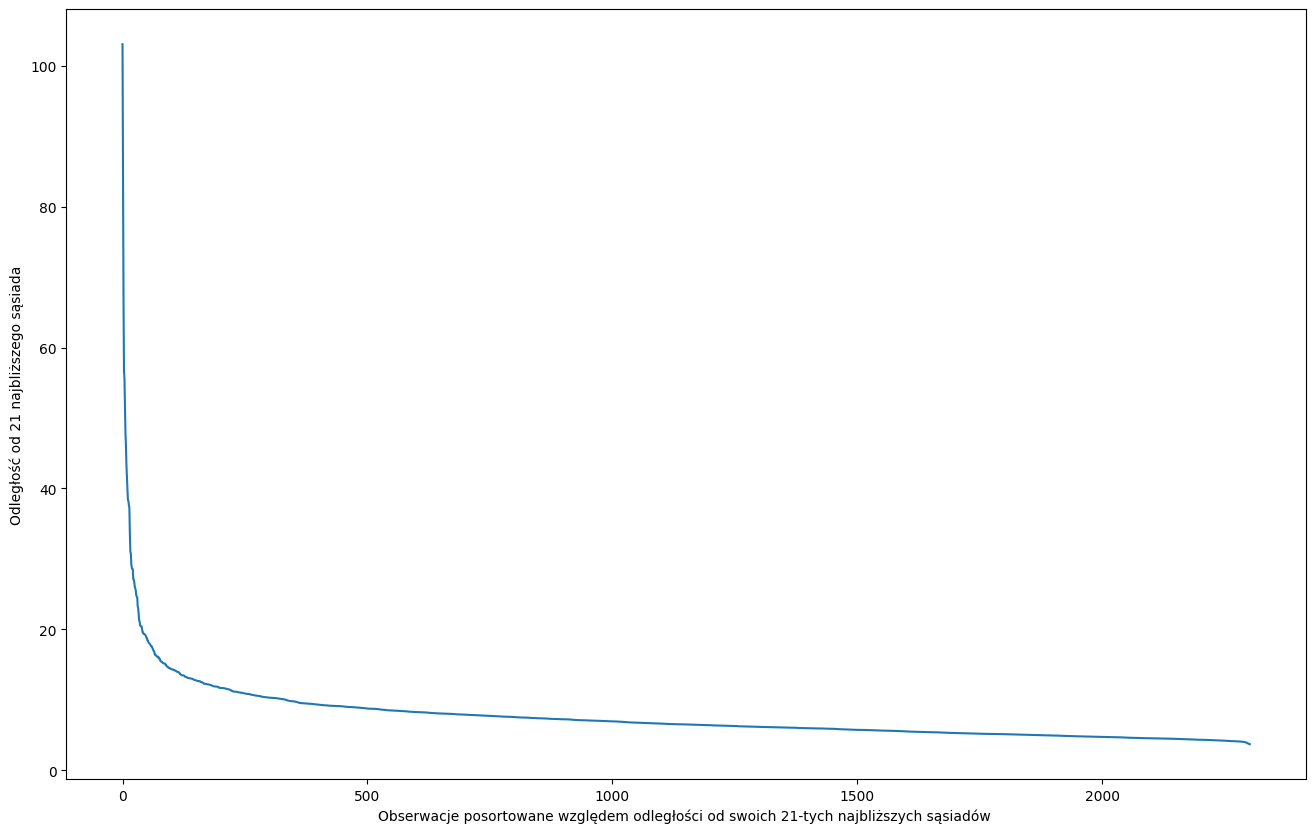

In [ ]:
k_dist = sorted(dist[:,-1], reverse = True)
plt.figure(figsize = (16,10))
plt.plot(k_dist)
plt.ylabel(f"Odległość od {k} najbliższego sąsiada")
plt.xlabel(f"Obserwacje posortowane względem odległości od swoich {k}-tych najbliższych sąsiadów ")
plt.show()

In [ ]:
eps = []
for obs in [5, 10, 25, 35, 75, 150, 250, 500, 1000, 1300, 2000, 2300]:
    eps.append(round(k_dist[obs],1))
eps

[51.3, 40.4, 26.1, 21.1, 15.9, 12.8, 10.9, 8.8, 7.0, 6.2, 6.1, 4.8, 3.7]

Po przeanalizowaniu wykresu moglibyśmy stwierdzić, że łatwo znaleźć punkt w którym krzywa zmienia nachylenie, jak się okazało nie było to takie oczywiste, najpierw zostanie sprawdzona wartość wydająca się odpowiednią, jednak dalej sprawdzimy jak wygląda podział na grupy dla konkretnych wartości eps z wcześniejszego bloku kodu.


In [ ]:
from sklearn.cluster import DBSCAN
dbscan1 = DBSCAN(eps = 15.9, min_samples = 22)
dbscan1.fit(x_train)

DBSCAN(eps=15.9, min_samples=22)

In [ ]:
dbscan1.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pd.Series(dbscan1.labels_).value_counts().to_frame()

,0
0,2273
-1,29


Jak widać powstały tylko dwie grupy, z czego w jednej znajduje się tylko 29 obserwacji, najwyraźniej parametr **eps** jest za duży. Spróbujmy zobaczyć jak będą wyglądały podziały przy różnych wartościach eps.

In [ ]:
for e in eps:
    dbscan = DBSCAN(eps = e, min_samples = 22)
    dbscan.fit(x_train)
    print('eps =', e)
    display(pd.Series(dbscan.labels_).value_counts().to_frame())

eps = 51.3


,0
0,2301
-1,1


eps = 40.4


,0
0,2298
-1,4


eps = 26.1


,0
0,2291
-1,11


eps = 21.1


,0
0,2286
-1,16


eps = 15.9


,0
0,2273
-1,29


eps = 12.8


,0
0,2251
-1,51


eps = 10.9


,0
0,2205
-1,97


eps = 8.8


,0
0,2105
-1,197


eps = 7.0


,0
0,1793
-1,509


eps = 6.2


,0
0,1450
-1,764
1,53
2,35


eps = 4.8


,0
-1,1489
0,480
2,242
1,42
3,38
4,11


eps = 3.7


,0
-1,2302


Podział na większą ilość grup zaczyna się przy bardzo niskim parametrze **eps** dlatego sprawdzimy 2 wartości: 6.2 oraz 4.8. Stworzy nam to podziały na odpowiednio 4 oraz 6 grup (wraz z grupą obserwacji odstających).

In [ ]:
wina_gr = x_train.copy()
dbscan = DBSCAN(eps = 6.2, min_samples = 22)
dbscan.fit(x_train)
wina_gr['Cluster1'] = dbscan.labels_
dbscan = DBSCAN(eps = 4.8, min_samples = 22)
dbscan.fit(x_train)
wina_gr['Cluster2'] = dbscan.labels_

Sprawdzimy wynik sylwetki dla kazdego grupowania.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

def silhouette_plot(X, y_pred, n_clusters):
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, y_pred)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, y_pred)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Wykres sylwetki")
    ax1.set_xlabel("Wartość współczynnika sylwetki")
    ax1.set_ylabel("Numer klastra")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


# Przed narysowaniem wykresu odrzucamy obserwacje odstające.


In [ ]:
wina_gr1 = wina_gr[wina_gr['Cluster1'] != -1]
zmienne_numeryczne = x_train.columns

For n_clusters = 3 The average silhouette_score is : 0.3772115207768571


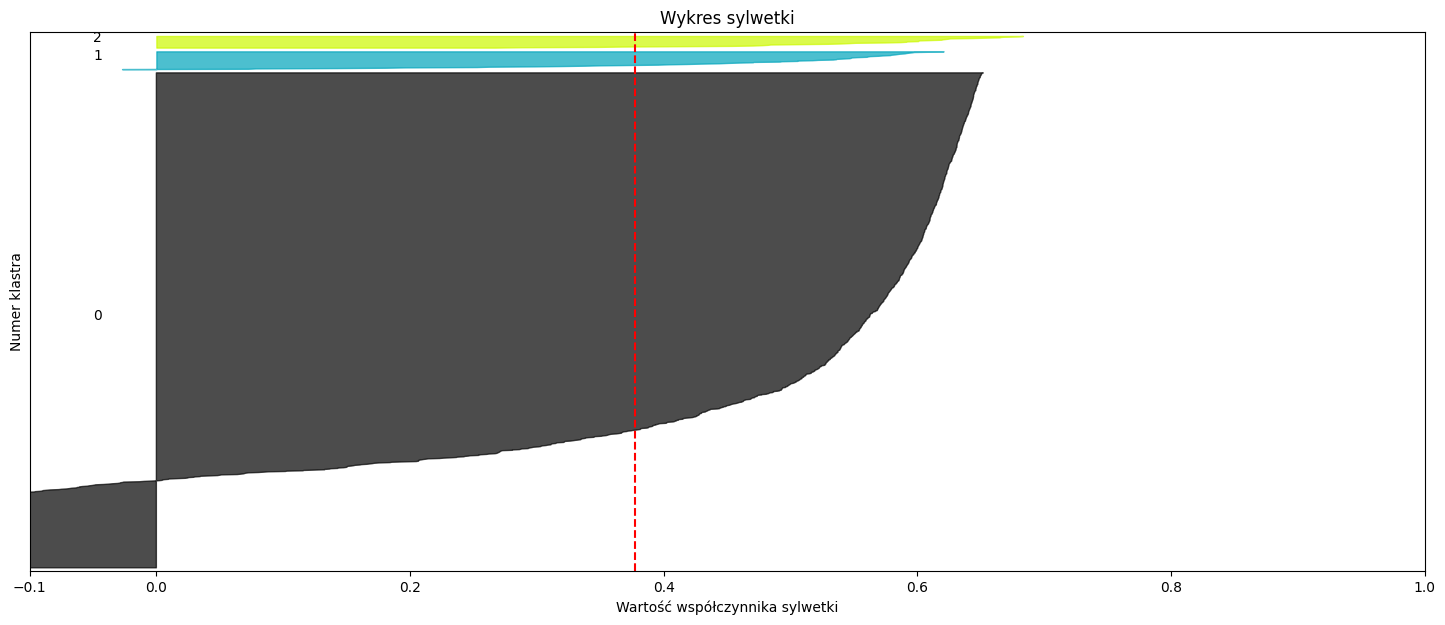

In [ ]:
silhouette_plot(wina_gr1[zmienne_numeryczne], wina_gr1['Cluster1'],3)

Miara sylwetki równa 0.377 pozwala na uznanie tego grupowania za poprawne, aczkolwiek jest pełno obserwacji, które zostały absolutnie źle zaklasyfikowane. Poza tym grupa 0 jest znacznie przeważająca jeżeli chodzi o ilość obserwacji.

In [ ]:
wina_gr2 = wina_gr[wina_gr['Cluster2'] != -1]

For n_clusters = 5 The average silhouette_score is : 0.14988498291960195


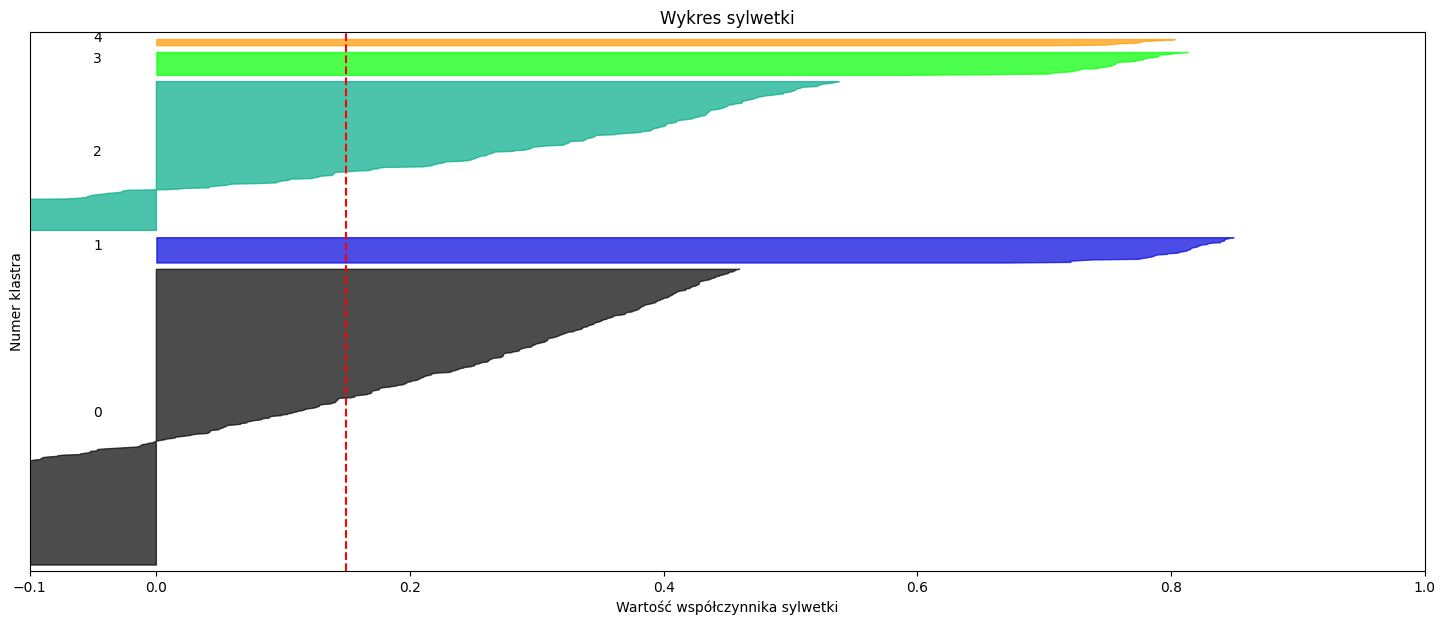

In [ ]:
silhouette_plot(wina_gr2[zmienne_numeryczne], wina_gr2['Cluster2'],5)

Pomimo utworzenia 3 grup o bardzo dobrym wyniku sylwetki to grupowania na 5 grup nie można uznać za poprawne, odrzucamy je. Grupy te są zbyt mało liczne by wywołały odpowiednie róznice.

Spróbujmy scharakteryzować grupy z pierwszego grupowania.

In [ ]:
wina_gr.groupby('Cluster1')['residualsugar'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster1,,,,,,,,
-1,764.0,8.775131,6.148461,0.7,2.375,8.4,13.200,65.80
0,1450.0,4.426138,3.535312,0.6,1.500,2.9,6.700,16.50
1,53.0,8.941509,3.386763,1.2,7.700,8.2,10.900,14.90
2,35.0,7.452857,3.040558,1.6,7.075,7.8,8.675,14.15


Grupa 0 ma wyraźnie mniej słodkie wina niż pozostałe dwie grupy.

In [ ]:
wina_gr.groupby('Cluster1')['alcohol'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster1,,,,,,,,
-1,764.0,10.047731,1.070834,8.0,9.20,9.8,10.6,13.90
0,1450.0,10.886729,1.173533,8.4,10.00,10.8,11.8,14.05
1,53.0,9.707547,0.708153,8.8,9.30,9.5,10.1,11.70
2,35.0,9.760952,0.858996,8.8,9.35,9.5,9.8,12.40


Grupa 0 ma wina z większą ilością alkoholu.

In [ ]:
wina_gr.groupby('Cluster1')['sulphates'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster1,,,,,,,,
-1,764.0,0.498547,0.114843,0.25,0.420,0.49,0.560,1.06
0,1450.0,0.484000,0.115401,0.22,0.400,0.46,0.540,1.08
1,53.0,0.474151,0.071641,0.31,0.430,0.48,0.510,0.71
2,35.0,0.500000,0.097045,0.32,0.425,0.49,0.565,0.75


Przy siarczanach nie widać dużej róznicy między grupami.

In [ ]:
wina_gr.groupby('Cluster1')['pH'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster1,,,,,,,,
-1,764.0,3.174804,0.149426,2.79,3.0800,3.16,3.2600,3.79
0,1450.0,3.210221,0.158170,2.72,3.1025,3.20,3.3075,3.81
1,53.0,3.165472,0.112311,2.89,3.1000,3.18,3.2300,3.45
2,35.0,3.180571,0.117096,2.90,3.1250,3.16,3.2250,3.45


Grupa 0 ma delikatnie większe pH niż grupy 1 i 2.

In [ ]:
wina_gr.groupby('Cluster1')['density'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster1,,,,,,,,
-1,764.0,0.995561,0.003364,0.98711,0.99320,0.99561,0.997853,1.03898
0,1450.0,0.992851,0.002307,0.98742,0.99110,0.99270,0.994400,1.00060
1,53.0,0.995982,0.001628,0.99120,0.99536,0.99586,0.997540,0.99870
2,35.0,0.995436,0.001650,0.99011,0.99514,0.99578,0.996210,0.99840


Grupy 1 i 2 to wina o większej gęstości.

In [ ]:
wina_gr.groupby('Cluster1')['fixedacidity'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster1,,,,,,,,
-1,764.0,6.936911,0.891565,4.2,6.4,6.8,7.4,10.7
0,1450.0,6.777207,0.862576,3.8,6.2,6.7,7.3,10.0
1,53.0,6.935849,0.768889,5.6,6.4,6.8,7.3,9.0
2,35.0,6.942857,0.633053,6.0,6.4,7.1,7.4,8.1


Grupa 2 ma średnio największą stałą kwasowość, ale również ma najmniejższy zakres tej kwasowości.

In [ ]:
wina_gr.groupby('Cluster1')['volatileacidity'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster1,,,,,,,,
-1,764.0,0.295903,0.117142,0.110,0.220,0.27,0.34,1.100
0,1450.0,0.272386,0.099627,0.085,0.200,0.25,0.32,0.785
1,53.0,0.288208,0.076981,0.180,0.250,0.27,0.31,0.570
2,35.0,0.300286,0.132432,0.130,0.235,0.28,0.32,0.850


In [ ]:
wina_gr.groupby('Cluster1')['citricacid'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster1,,,,,,,,
-1,764.0,0.344634,0.133222,0.00,0.260,0.32,0.410,1.00
0,1450.0,0.321345,0.110734,0.00,0.260,0.31,0.370,1.00
1,53.0,0.361132,0.131144,0.14,0.260,0.35,0.450,0.91
2,35.0,0.325143,0.119788,0.14,0.255,0.30,0.395,0.62


Grupa 1 ma wyższe stężenie kwasu cytrynowego niż pozostałe grupy.

In [ ]:
wina_gr.groupby('Cluster1')['chlorides'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster1,,,,,,,,
-1,764.0,0.050283,0.028138,0.016,0.039,0.046,0.053,0.346
0,1450.0,0.043139,0.019418,0.014,0.034,0.040,0.048,0.255
1,53.0,0.049151,0.008872,0.024,0.045,0.049,0.053,0.075
2,35.0,0.049371,0.024366,0.028,0.040,0.045,0.050,0.168


Jeżeli chodzi o chlorki to nie widać dużego zróżnicowania.

In [ ]:
wina_gr.groupby('Cluster1')['freesulfurdioxide'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster1,,,,,,,,
-1,764.0,42.670812,21.880153,3.0,26.75,42.0,59.0,138.5
0,1450.0,29.590690,11.091511,4.0,21.00,29.0,38.0,58.0
1,53.0,49.773585,3.377764,44.0,47.00,49.0,52.0,57.0
2,35.0,46.742857,3.483937,40.0,44.00,47.0,50.0,53.0


In [ ]:
wina_gr.groupby('Cluster1')['totalsulfurdioxide'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster1,,,,,,,,
-1,764.0,165.551047,47.636106,9.0,140.0,173.0,194.0,313.0
0,1450.0,119.211034,26.574185,56.0,100.0,119.0,139.0,176.0
1,53.0,196.943396,4.533699,190.0,194.0,197.0,201.0,207.0
2,35.0,181.885714,3.007554,177.0,179.5,182.0,184.5,187.0


Grupy 1 oraz 2 mają wyraźnie wyższy poziom dwutlenku siarki, zarówno wolnego jak i całkowitego.

Podsumowując, można powiedzieć że grupa 0 to wina mniej słodkie, delikatnie mocniejsze oraz o krótszym terminie spożycia(wskazuje na to niższe stężenie dwutlenku siarki, odpowiedzialnego za hamowanie rozwoju drobnoustrojów oraz przeciwdziałanie utlenianiu), natomiast grupy 1 i 2 to wina słodsze, delikatniejsze w procentach, trwalsze oraz lekko kwaśniejsze. Trzeba oczywiście przypomnieć o gigantycznej przewadze w ilości win w grupie 0, oraz o fakcie zaklasyfikowania aż 764 win jako obserwacje odstające. Moim zdaniem obserwacje odstające mogłyby zostać połączone z grupami 1 i 2, tworząc w ten sposób podział na dwie grupy z możliwe, że mniejszymi ale widocznymi różnicami.

Zastosujmy jeszcze podany podział do zbioru testowego, oraz sprawdźmy czy istnieje związek między grupowaniem a jakością wina, moja intuicja podpowiada mi o braku takiego związku, ale sprawdźmy to.

In [ ]:
wina_test_gr = x_test.copy()
dbscan = DBSCAN(eps = 6.2, min_samples = 22)
dbscan.fit(x_test)
wina_test_gr['Cluster1'] = dbscan.labels_

Sprawdźmy jakość grupowania.

In [ ]:
pd.Series(dbscan.labels_).value_counts().to_frame()

,0
-1,741
0,229
1,17


Takie grupowanie nie sprawdziło się w przypadku zbioru testowego, zostały stworzone tylko dwie grupy z czego grupa 0 ma 229 obserwacji a grupa 1 tylko 17, natomiast największy zbiór (aż 741 obserwacji) został zaklasyfikowany jako obserwacje odstające. Sprawdźmy jakość sylwetki.

In [ ]:
wina_test_gr1 = wina_test_gr[wina_test_gr['Cluster1'] != -1]

For n_clusters = 2 The average silhouette_score is : 0.29286852623653575


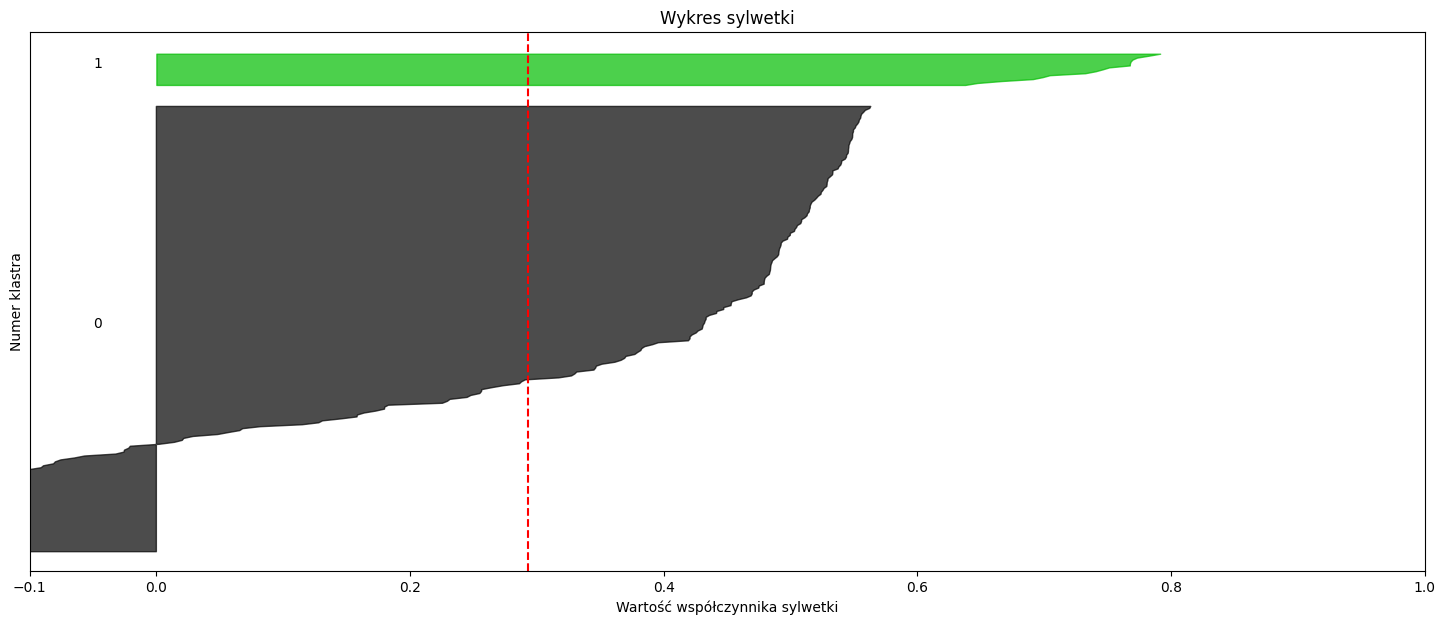

In [ ]:
silhouette_plot(wina_test_gr1[zmienne_numeryczne], wina_test_gr1['Cluster1'],2)

Średnia miara sylwetki wynosi 0.29 co jest poprawnym grupowaniem, ale nie uwzględnia to obserwacji odstających. Moim zdaniem takie grupowanie nie spełnia swojej roli.

In [ ]:
data['group'] = wina_gr['Cluster1']
test_data['group'] = wina_test_gr['Cluster1']

Sprawdźmy czy grupowanie ma związek z jakością wina.

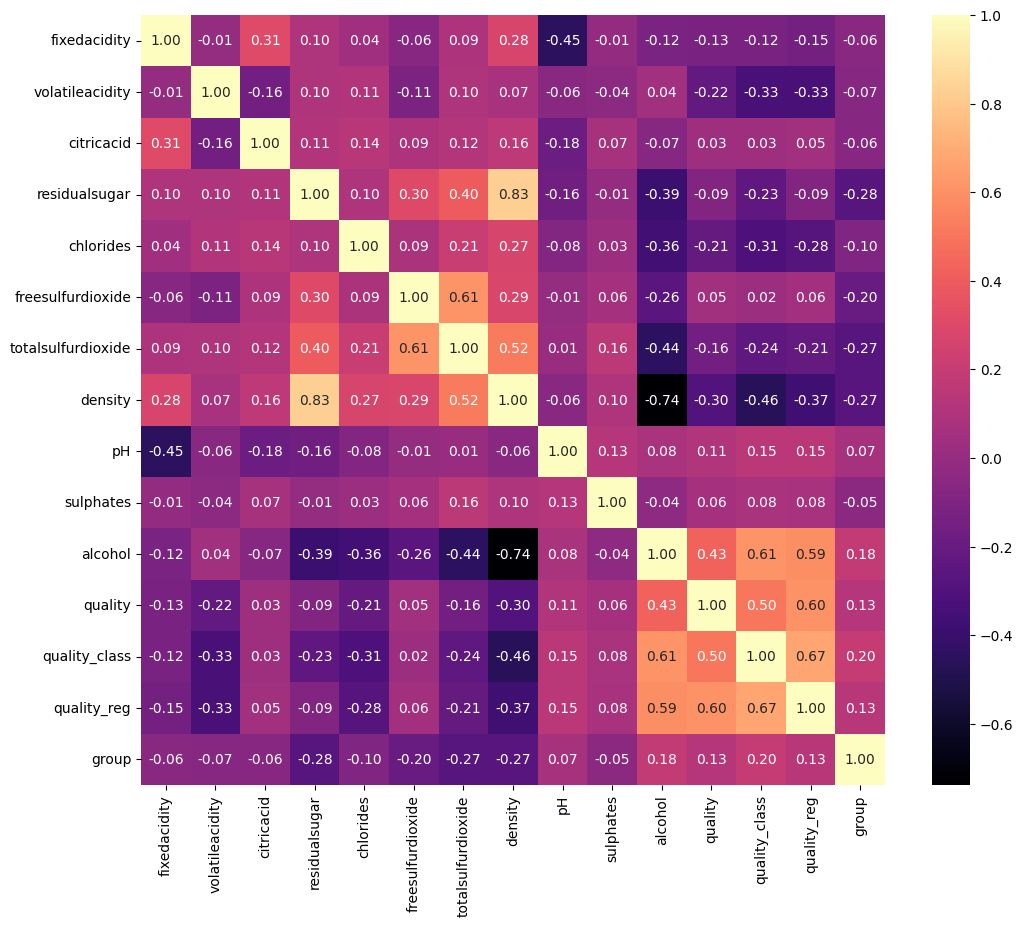

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap="magma",fmt='.2f')
plt.show()

Według macierzy korelacji związek między grupowaniem a jakością wina jest bardzo mały, korelacja wynosi tylko 0.13

In [ ]:
data.to_csv(r"white_wine_train.csv", index=False)
test_data.to_csv(r"white_wine_test.csv", index=False)